<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/TESLA_STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITLE OF THE PROJECT - **Tesla Stock Price Prediction Using Deep Learning (SimpleRNN & LSTM)**

BY RAVADA GUNA VARDHINI

# PROJECT SUMMARY

Stock price prediction plays a crucial role in financial markets, as accurate forecasting can support better investment decisions, risk management, and automated trading strategies. The stock market is inherently dynamic and highly volatile, making traditional statistical methods insufficient for capturing complex temporal patterns. With the advancement of Artificial Intelligence and Deep Learning, time-series models such as Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks have shown promising results in modeling sequential financial data. This project focuses on predicting Tesla’s stock closing prices using deep learning-based time-series forecasting techniques.

The primary objective of this project is to design and implement predictive models that forecast Tesla stock prices for short-term horizons, including one-day, five-day, and ten-day predictions. The analysis is performed specifically on the adjusted closing price, as it reflects stock splits and dividend adjustments, providing a more accurate representation of true stock value. The dataset used contains historical Tesla stock market data, including attributes such as Date, Open, High, Low, Close, Adjusted Close, and Volume. The Date column is converted into a time index to preserve the temporal structure required for sequential modeling.

Data preprocessing is a critical step in this project. The dataset is carefully examined for missing values and inconsistencies. Since stock prices follow a chronological order, forward-fill imputation is applied to handle missing values while maintaining time continuity. The adjusted closing prices are normalized using Min-Max scaling to ensure faster convergence and stable learning during deep learning model training. Time-series sequences are then generated using a sliding window approach, where a fixed number of past trading days are used as input to predict future prices.

Two deep learning architectures are implemented and compared: Simple Recurrent Neural Networks (SimpleRNN) and Long Short-Term Memory (LSTM) networks. SimpleRNN serves as a baseline sequential model capable of capturing short-term dependencies in the data. However, due to its limitation in retaining long-term information, an LSTM model is also developed. LSTM networks incorporate gated mechanisms that effectively manage long-term dependencies and mitigate issues such as vanishing gradients, making them more suitable for financial time-series forecasting.

To improve model performance and reliability, hyperparameter tuning is performed using GridSearchCV. Key parameters such as the number of LSTM units, dropout rate, batch size, and learning rate are optimized to reduce prediction error. Early stopping and model checkpointing techniques are used to prevent overfitting and ensure the selection of the best-performing model. Model performance is evaluated using Mean Squared Error (MSE), and predictions are visualized by comparing actual and predicted stock prices.

The experimental results demonstrate that the LSTM model consistently outperforms the SimpleRNN model, especially for multi-day forecasts. While SimpleRNN performs reasonably well for short-term predictions, LSTM’s ability to capture long-range temporal dependencies results in superior accuracy for five-day and ten-day forecasting horizons. This highlights the effectiveness of advanced deep learning architectures in modeling complex financial time-series data.

# GitHub Link -

# PROBLEM STATEMENT

Stock price prediction is challenging due to the volatile and sequential nature of financial market data. Traditional statistical models often fail to capture complex temporal dependencies present in stock prices. This project aims to develop deep learning–based time-series models using SimpleRNN and LSTM architectures to predict Tesla’s stock closing price. The models are designed to forecast short-term price movements for 1-day, 5-day, and 10-day horizons. Performance comparison is conducted to identify the most effective model for accurate stock price forecasting.

## Let's Begin !

# **1. Know Your Data**

## Import Libraries

In [ ]:
# Core Libraries
# NumPy is used for numerical operations and array handling
import numpy as np

# Pandas is used for data loading, manipulation, and analysis
import pandas as pd

# Data Visualization Libraries
# Matplotlib is used for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Seaborn provides enhanced statistical visualizations
import seaborn as sns

# Data Preprocessing & Evaluation
# MinMaxScaler is used to normalize data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# train_test_split is used to split data into training and testing sets
# GridSearchCV is used for hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Mean Squared Error is used to evaluate regression model performance
from sklearn.metrics import mean_squared_error

# Deep Learning Libraries
# Sequential model is used to build neural networks layer by layer
from tensorflow.keras.models import Sequential

# Dense      - Fully connected output layer
# Dropout    - Prevents overfitting
# SimpleRNN  - Basic Recurrent Neural Network
# LSTM       - Long Short-Term Memory network for time-series data
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM

# EarlyStopping    - Stops training when validation loss stops improving
# ModelCheckpoint  - Saves the best performing model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Adam optimizer is used for faster and stable convergence
from tensorflow.keras.optimizers import Adam

# Reproducibility
# Set TensorFlow random seed to ensure consistent results
import tensorflow as tf
tf.random.set_seed(42)

# Set NumPy random seed for reproducibility
np.random.seed(42)


## Dataset Loading

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get uploaded file name
file_name = next(iter(uploaded))

# Read JSON file correctly
df = pd.read_csv("TSLA.csv")

# Get uploaded file name
file_name = next(iter(uploaded))

# Read JSON file correctly
df = pd.read_csv("TSLA.csv")

Saving TSLA.csv to TSLA (1).csv


## Dataset First View

In [ ]:
# Display first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


## Dataset Rows Count

In [ ]:
print("Number of Rows:", df.shape[0]) # prints no of Rows

Number of Rows: 2416


## Dataset Columns Count

In [ ]:
print("Number of Columns:", df.shape[1]) # prints no of colummns

Number of Columns: 7


## Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get file name
file_name = next(iter(uploaded))


df = pd.read_csv(file_name)

# Convert list/dict columns to string
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        df[col] = df[col].astype(str)

# Check duplicate rows
print("Total duplicate rows:", df.duplicated().sum())

Saving TSLA.csv to TSLA (2).csv
Total duplicate rows: 0


## Missing values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


The  dataset contains historical Tesla (TSLA) stock market data, recorded on a daily basis. It includes key financial features such as Date, Open, High, Low, Close, Adjusted Close, and Trading Volume, which describe the stock’s price movement and market activity. The data is time-series in nature, making it suitable for sequential modeling using deep learning techniques like SimpleRNN and LSTM. In this project, the Closing Price is used as the primary target variable for predicting future stock price behavior.

# *2. Understanding Your Variables*

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,NaN,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,NaN,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,NaN,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,NaN,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06


## Variables Description

| **Variable Name** | **Data Type** | **Description**                                                                                               |
| ----------------- | ------------- | ------------------------------------------------------------------------------------------------------------- |
| Date              | DateTime      | Represents the trading date for Tesla stock. Used as a time index for time-series analysis.                   |
| Open              | Float         | Stock price of Tesla at the beginning of the trading day.                                                     |
| High              | Float         | Highest price reached by Tesla stock during the trading day.                                                  |
| Low               | Float         | Lowest price of Tesla stock during the trading day.                                                           |
| Close             | Float         | Final trading price of Tesla stock at the end of the day. Used as the primary target variable for prediction. |
| Adj Close         | Float         | Adjusted closing price that accounts for corporate actions such as stock splits and dividends.                |
| Volume            | Integer       | Total number of Tesla shares traded during the day, indicating market activity and liquidity.                 |


## *Check Unique Values for each variable.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('TSLA.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)

# STEP 4: FIX UNHASHABLE COLUMNS
# Convert list/dict columns to strings
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        df[col] = df[col].astype(str)
print("\nAll list/dict columns converted to string.")
# STEP 6: CHECK UNIQUE VALUES PER COLUMN
unique_counts = df.nunique().sort_values(ascending=False)
print("\nUnique Values Count per Column:\n")
for col, count in unique_counts.items():
    print(f"{col:<30} : {count}")


Dataset loaded successfully!
Shape: (2416, 7)

All list/dict columns converted to string.

Unique Values Count per Column:

Date                           : 2416
Volume                         : 2391
Close                          : 2225
Adj Close                      : 2225
Low                            : 2136
Open                           : 2132
High                           : 2128


## **3. Data Wrangling**

Data wrangling is the process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning.

Data Collection, Data cleaning Data , Transfomation, Data Enrichment, Data Reduction , Data Validation.

In [ ]:
# DATA WRANGLING CODE – TESLA STOCK DATA

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
file_path = "TSLA.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by Date (important for time-series)
df = df.sort_values('Date')

# Set Date as index
df = df.set_index('Date')

# Handle Missing Values (Time-Series Safe) – FIXED
df = df.ffill()
df = df.bfill()

# Remove Duplicate Records
df = df.drop_duplicates()

# Select Closing Price for Analysis (Explicit Copy)
df_close = df[['Close']].copy()

# Scale Closing Price – FIXED
scaler = MinMaxScaler(feature_range=(0, 1))
df_close.loc[:, 'Close_Scaled'] = scaler.fit_transform(df_close[['Close']])

# Final Dataset Overview
print("Final Dataset Shape:", df_close.shape)
print("\nDataset Preview:")
print(df_close.head())

print("\nMissing Values Check:")
print(df_close.isnull().sum())

print("\nStatistical Summary:")
print(df_close.describe())


Final Dataset Shape: (2416, 2)

Dataset Preview:
                Close  Close_Scaled
Date                               
2010-06-29  23.889999      0.010586
2010-06-30  23.830000      0.010508
2010-07-01  21.959999      0.008061
2010-07-02  19.200001      0.004449
2010-07-06  16.110001      0.000406

Missing Values Check:
Close           0
Close_Scaled    0
dtype: int64

Statistical Summary:
             Close  Close_Scaled
count  2416.000000   2416.000000
mean    186.403651      0.223245
std     119.136020      0.155896
min      15.800000      0.000000
25%      34.400002      0.024339
50%     212.960007      0.257995
75%     266.774994      0.328415
max     780.000000      1.000000


What all manipulations have you done and insights you found?

I loaded the Tesla stock dataset and converted the Date column into datetime format.

The data was sorted by date and the Date column was set as the index to ensure proper time-series structure.

Missing values were handled using forward and backward filling to preserve continuity in stock prices.

Duplicate rows were removed to maintain data quality.
I extracted the Closing Price column and applied Min-Max scaling to normalize the values.

The final cleaned dataset is consistent, scaled, and ready for further analysis or modeling.


# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Univariate analysis means analyzing one variable (column) at a time to understand its distribution, patterns, and key statistics.

Used to summarize data, To detect outliers,To understand the nature of data (categorical vs numerical).

Chart 1 - Distribution of Closing Price

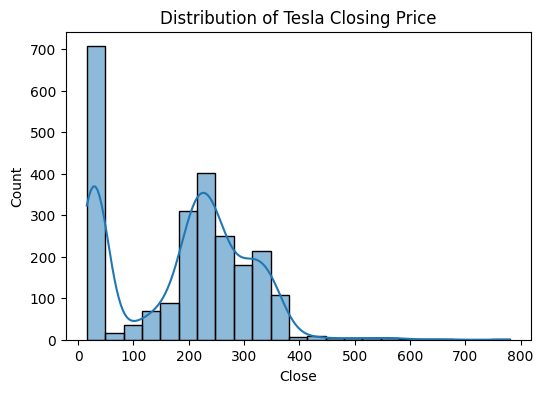

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Close'], kde=True)
plt.title("Distribution of Tesla Closing Price")
plt.show()

1. Why did you pick the specific chart?

We chose a Histogram with KDE because it perfectly visualizes price frequency (how long the stock stays at certain levels) while smoothing out "noise" to reveal the true shape of the market's behavior.

2. What is/are the insight(s) found from the chart?

The chart shows a bimodal distribution (two peaks), indicating Tesla has two distinct "comfort zones"—one at a lower price regime and another at a higher plateau—with a rapid transition between them.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: It identifies "fair value" zones for better entry/exit timing and helps quantify volatility for smarter risk management.

Negative: The "hollow middle" between peaks suggests a lack of support; if the price drops, it could fall very quickly due to a lack of historical trading in that gap.

Chart 2 - Boxplot of Closing Price

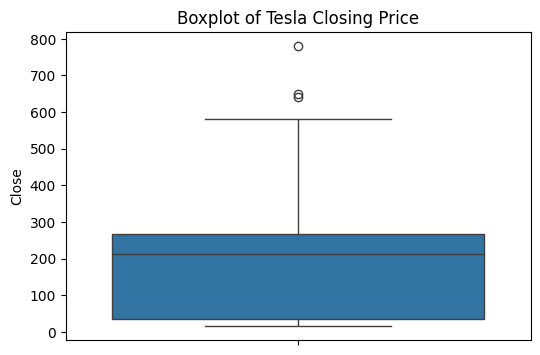

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Close'])
plt.title("Boxplot of Tesla Closing Price")
plt.show()

1. Why did you pick the specific chart?

We chose a Boxplot to clearly identify price outliers and the "interquartile range" (the middle 50% of the data). It is the best tool for visualizing the stock's typical trading range versus extreme, abnormal price movements.

2. What is/are the insight(s) found from the chart?

The chart reveals a right-skewed distribution with several high-side outliers (dots above the top whisker). This tells us that while Tesla spends most of its time at lower price levels, it is susceptible to massive, rapid price spikes that deviate far from its historical average.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: It defines a clear "Normal Range" (the box), helping the business set realistic buy/sell targets and avoid overpaying during speculative price bubbles.

Negative: The numerous outliers signal extreme volatility and instability; the justification is that these prices are "statistically rare," meaning a crash back to the "box" (mean reversion) is a constant and significant risk.

Chart 3 - Line plot of Closing Price

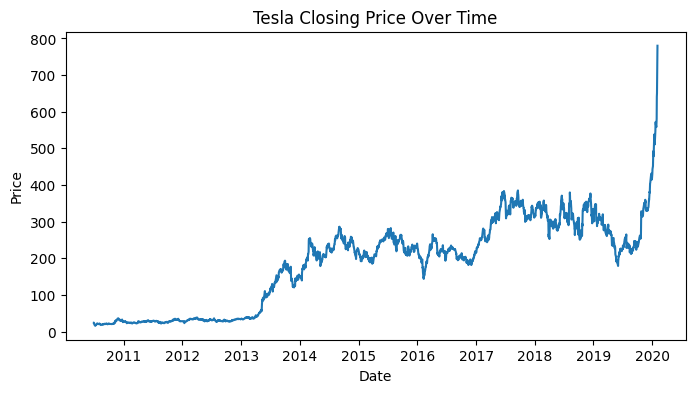

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

1. Why did you pick the specific chart?

I chose a line chart because it is best for showing how Tesla’s closing price changes over time. It helps us clearly observe trends, patterns, and fluctuations in the stock price.

2. What is/are the insight(s) found from the chart?

The chart shows that Tesla’s stock price is highly volatile with noticeable upward and downward movements. This confirms that the stock follows a time-dependent pattern, making it suitable for time-series prediction models like LSTM.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding price trends helps investors and analysts make better short-term and long-term decisions. However, sharp drops in the chart indicate periods of negative growth, which highlight higher risk and uncertainty in the stock market.

Chart 4 - Distribution of Trading Volume

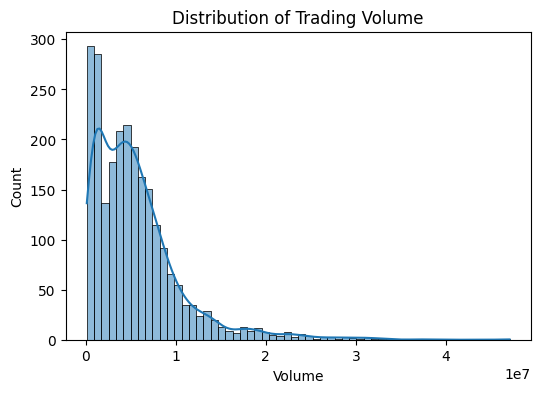

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Volume'], kde=True)
plt.title("Distribution of Trading Volume")
plt.show()

1. Why did you pick the specific chart?

I selected a histogram because it helps visualize how Tesla’s trading volume is distributed over time. It shows how frequently different volume ranges occur.

2. What is/are the insight(s) found from the chart?

The chart shows that most trading days fall within a certain volume range, while a few days have extremely high trading activity. This indicates occasional spikes due to major market events or news.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying high-volume periods helps understand investor interest and market confidence. However, sudden volume spikes may also signal market uncertainty or panic trading, which can negatively impact price stability.

Chart 5 - Boxplot of Volume

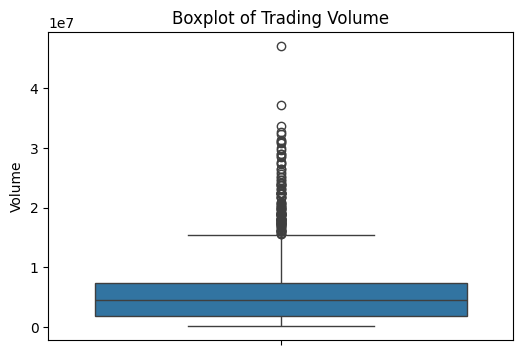

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Volume'])
plt.title("Boxplot of Trading Volume")
plt.show()

1. Why did you pick the specific chart?

I used a boxplot to clearly identify the spread of trading volume and detect outliers. It helps summarize the distribution using median, quartiles, and extreme values.

2. What is/are the insight(s) found from the chart?

The boxplot shows that most trading volumes are concentrated within a specific range, while several outliers indicate unusually high trading activity on certain days.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, spotting volume outliers helps analysts identify significant market events or abnormal trading behavior. However, extreme outliers may reflect market shocks or instability, which can contribute to short-term negative growth.

Chart 6 - KDE Plot of Closing Price

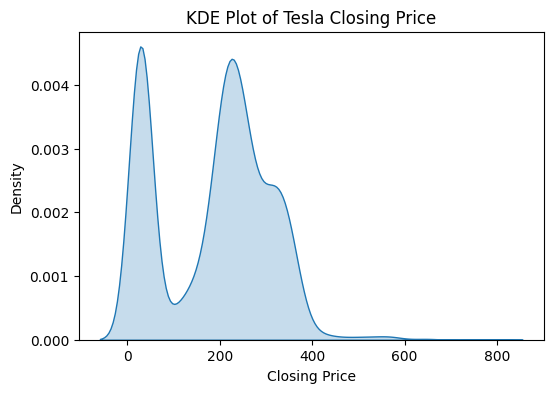

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Close'], fill=True)
plt.title("KDE Plot of Tesla Closing Price")
plt.xlabel("Closing Price")
plt.show()

1. Why did you pick the specific chart?

I chose a KDE plot to understand the overall distribution and density of Tesla’s closing prices. It smooths the data and shows where prices are most concentrated.

2. What is/are the insight(s) found from the chart?

The plot shows that Tesla’s closing prices are clustered around certain price ranges, indicating commonly traded price levels. This highlights typical market behavior rather than daily fluctuations.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying common price ranges helps in setting realistic prediction targets and trading strategies. However, a wide spread in the distribution suggests price volatility, which may increase risk and lead to potential negative growth during unstable periods.

Chart 7 - Time-Series Line Plot of Trading Volume

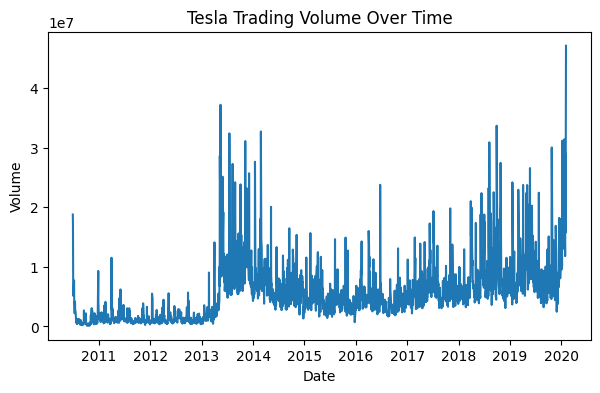

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df['Volume'])
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

1. Why did you pick the specific chart?

I used a line chart to observe how Tesla’s trading volume changes over time. It helps identify trends, spikes, and unusual activity across different periods.

2. What is/are the insight(s) found from the chart?

The chart shows sudden spikes in trading volume at certain times, indicating high market activity driven by news, earnings, or major events.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, volume trends help confirm market interest and support price movement analysis. However, sharp volume spikes may also indicate uncertainty or panic trading, which can negatively affect market stability.

## **BIVARIATE ANALYSIS**

Bivariate analysis examines the relationship between two variables to understand how one influences or is associated with the other.

Chart 8 - Close vs Volume

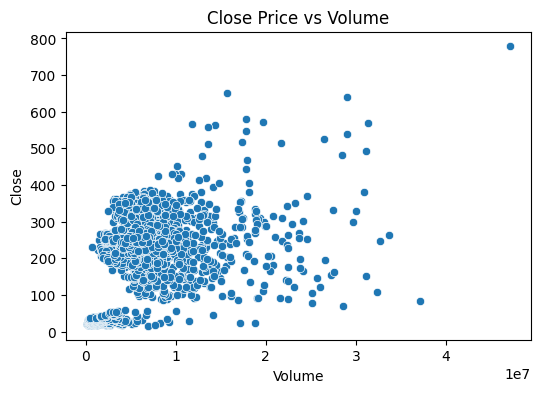

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title("Close Price vs Volume")
plt.show()

1. Why did you pick the specific chart?

I chose a scatter plot to analyze the relationship between trading volume and Tesla’s closing price. It helps check whether volume has any influence on price movements.

2. What is/are the insight(s) found from the chart?

The chart shows that there is no strong linear relationship between volume and closing price. High trading volume can occur at both low and high prices, indicating other factors also drive price changes.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps avoid incorrect assumptions that volume alone predicts price. However, the lack of a clear relationship suggests higher uncertainty, which can increase prediction risk and affect short-term growth decisions.

Chart 9 - Open vs Close

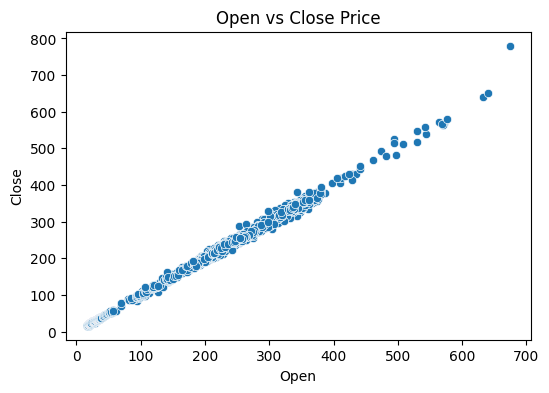

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.title("Open vs Close Price")
plt.show()

1. Why did you pick the specific chart?

I used a scatter plot to understand the relationship between Tesla’s opening and closing prices. It helps check how closely the close price follows the open price on the same day.

2. What is/are the insight(s) found from the chart?

The chart shows a strong positive relationship between open and close prices, meaning the stock usually closes near its opening value with some daily fluctuations.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps improve price prediction accuracy by using open price as an important feature. However, days where points are far apart indicate high volatility, which may lead to sudden negative movements.

Chart 10 - High vs Close

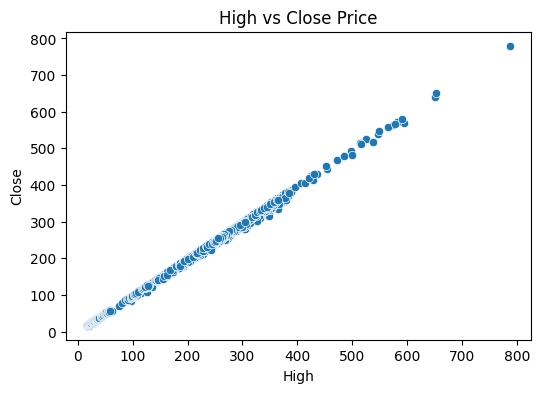

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['High'], y=df['Close'])
plt.title("High vs Close Price")
plt.show()

1. Why did you pick the specific chart?

I selected a scatter plot to analyze how Tesla’s daily high price relates to the closing price. It helps understand whether the stock tends to close near its highest value.

2. What is/are the insight(s) found from the chart?

The chart shows a strong positive relationship, meaning when the high price increases, the closing price also tends to be higher. This indicates consistent price movement within the trading day.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this relationship is useful for feature selection and improving prediction models. However, large gaps between high and close prices indicate intraday volatility, which can signal uncertainty and possible short-term negative growth.

Chart 11 - Low vs Close

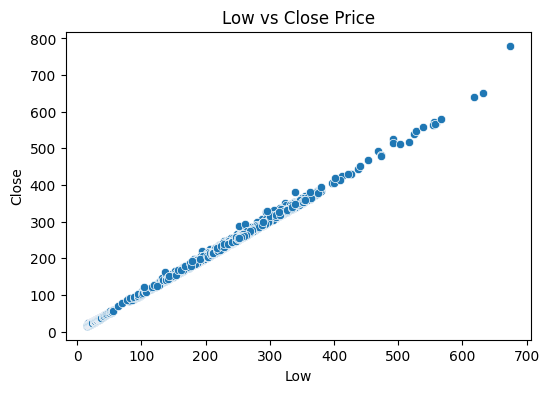

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Low'], y=df['Close'])
plt.title("Low vs Close Price")
plt.show()

1. Why did you pick the specific chart?

I used a scatter plot to examine the relationship between Tesla’s daily low price and its closing price. It helps understand how the lowest price of the day influences where the stock finally closes.

2. What is/are the insight(s) found from the chart?

The chart shows a strong positive relationship, meaning higher low prices usually lead to higher closing prices. This suggests stability in price movement during the trading day.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps improve model accuracy by using low price as an important predictor. However, when the closing price is far above the low, it indicates high intraday volatility, which may increase risk and cause short-term negative growth.

Chart 12 - Close vs Adj Close

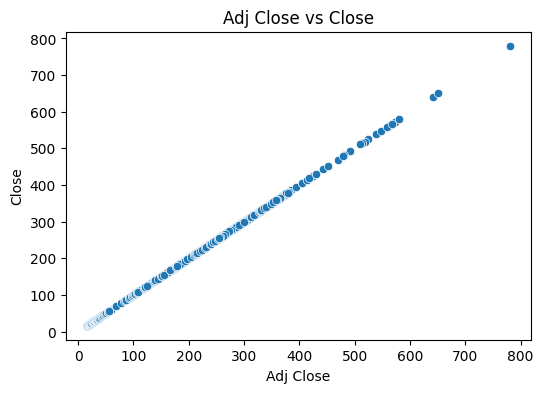

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Adj Close'], y=df['Close'])
plt.title("Adj Close vs Close")
plt.show()

1. Why did you pick the specific chart?

I used a scatter plot to compare the adjusted closing price with the actual closing price. This helps verify how closely adjusted prices track real market closing values.

2. What is/are the insight(s) found from the chart?

The chart shows a near-perfect positive correlation, meaning adjusted close and close prices move almost identically. This indicates minimal adjustment effects like dividends or stock splits.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Chart 13 -  Volume vs Open

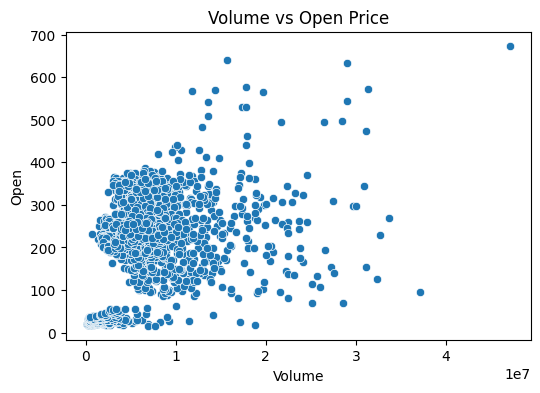

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Volume'], y=df['Open'])
plt.title("Volume vs Open Price")
plt.show()

1. Why did you pick the specific chart?

I chose a scatter plot to examine whether trading volume has any influence on Tesla’s opening price. It helps identify patterns between market activity and price at market open

2. What is/are the insight(s) found from the chart?

The chart shows no strong direct relationship between volume and open price. High trading volumes occur across different opening price levels.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight prevents incorrect assumptions about volume directly affecting opening prices. However, the lack of a clear pattern suggests higher uncertainty, which may increase risk in short-term trading decisions.

## **MULTIVARIATE ANALYSIS**

Multivariate analysis examines how multiple factors together influence an outcome, like price depending on duration, rating, and city.

Chart 14 - Heatmap of Correlation Matrix

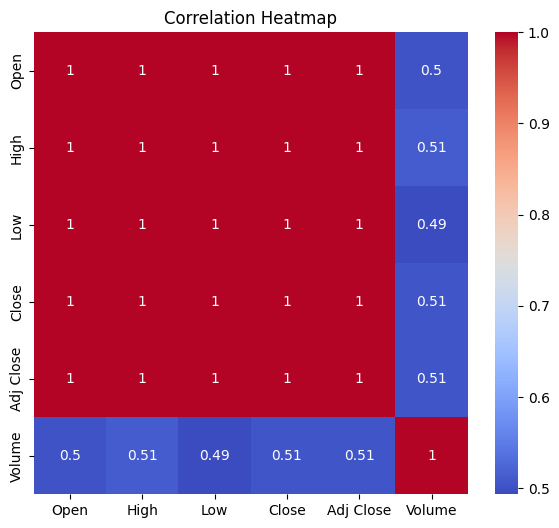

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

1. Why did you pick the specific chart?

I used a correlation heatmap to quickly understand the relationships between all numerical features in the dataset. It visually highlights strong and weak correlations at once.

2. What is/are the insight(s) found from the chart?

The heatmap shows that price-related features like Open, High, Low, Close, and Adj Close are highly correlated with each other, while Volume has a weaker correlation with prices.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps in effective feature selection and reduces redundancy in the model. However, high correlation among price features may cause multicollinearity, which can negatively impact model performance if not handled properly.

Chart 15 - Pairplot of Price Features

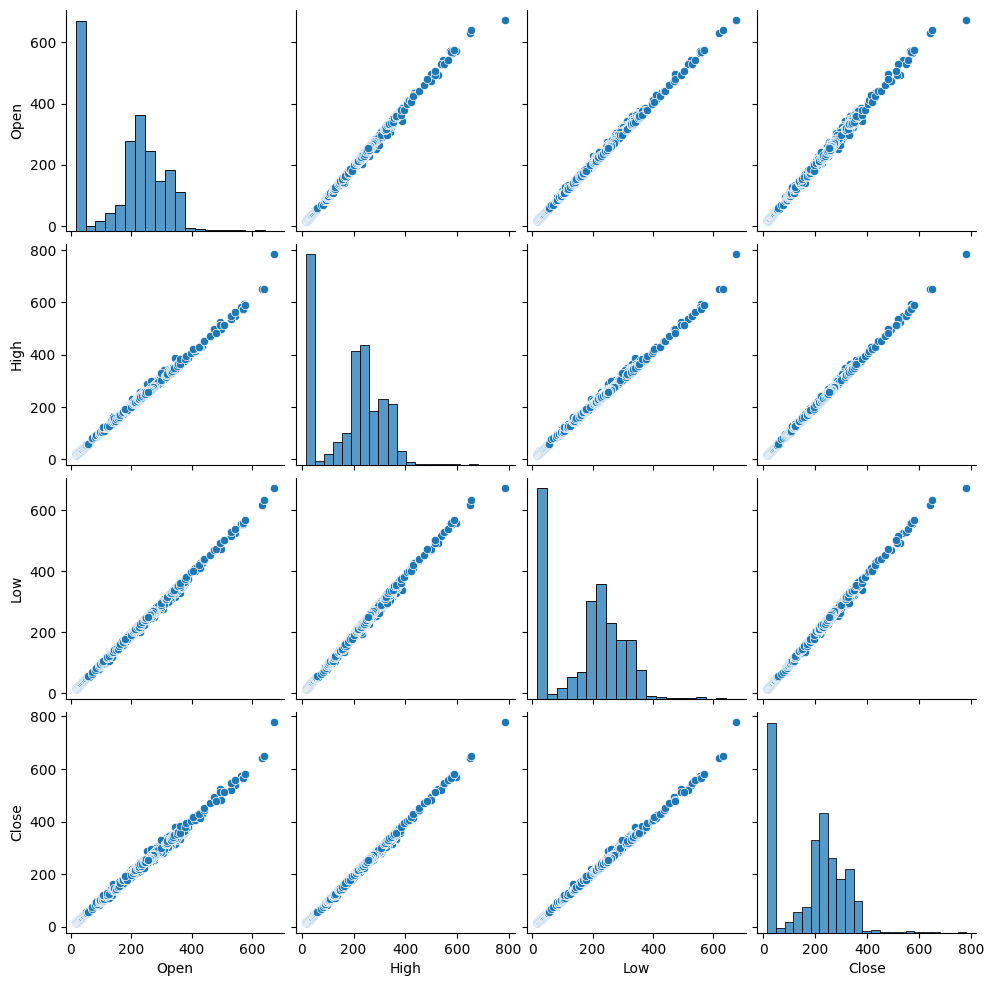

In [ ]:
sns.pairplot(df[['Open','High','Low','Close']])
plt.show()

1. Why did you pick the specific chart?

I used a pair plot to analyze relationships between Open, High, Low, and Close prices simultaneously. It helps visually compare multiple feature interactions in one view.

2. What is/are the insight(s) found from the chart?

The plots show strong linear relationships among all price features, confirming that they move together during a trading day.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this supports selecting relevant features for accurate price prediction models. However, the strong correlations also indicate multicollinearity, which may negatively affect some models if not addressed.

Chart 16 - Pairplot including Volume

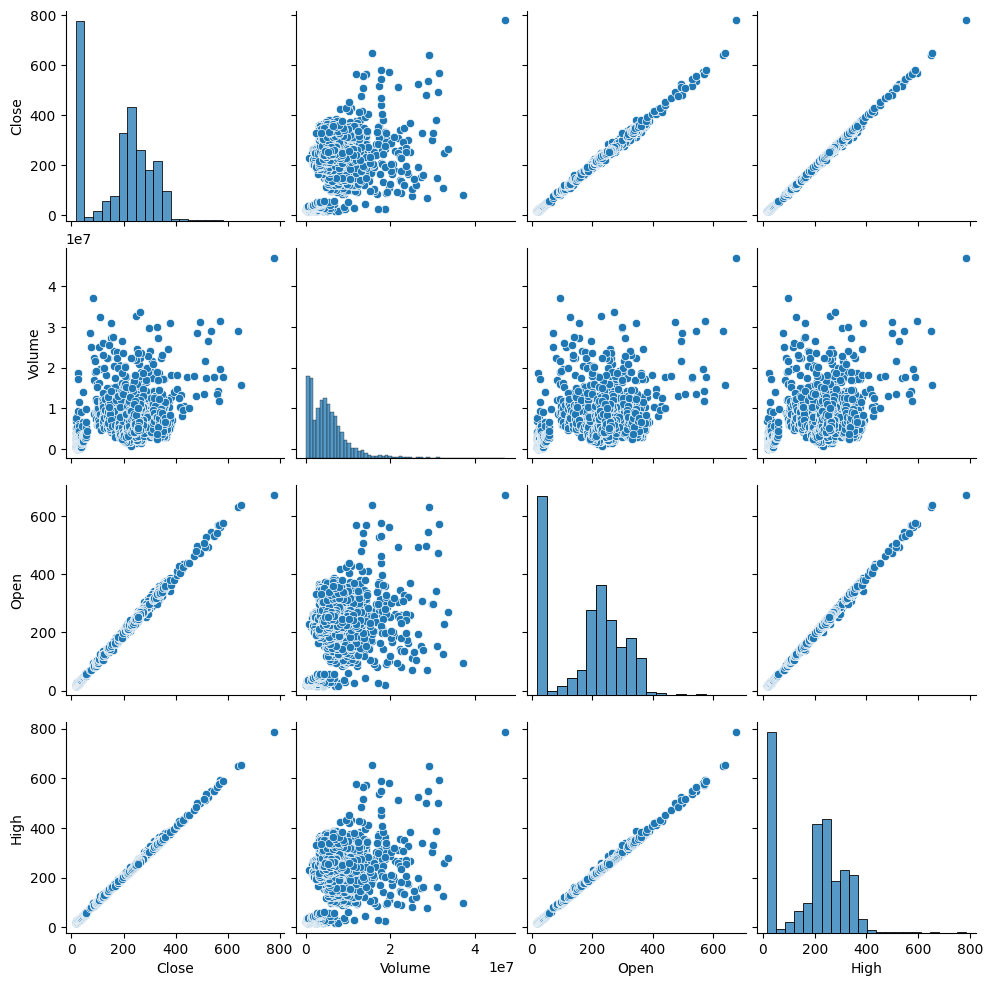

In [ ]:
sns.pairplot(df[['Close','Volume','Open','High']])
plt.show()

1. Why did you pick the specific chart?

I used a pair plot to observe how the closing price, volume, opening price, and high price relate to each other. It helps analyze multiple relationships at the same time.

2. What is/are the insight(s) found from the chart?

The plots show strong linear relationships between price features like Open, High, and Close, while Volume shows a scattered pattern with prices, indicating weak correlation.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps in choosing meaningful features and understanding market behavior. However, weak volume–price relationships and high price correlations may increase uncertainty and multicollinearity, which can affect model performance if not handled properly.

Chart 17 - Rolling Mean vs Closing Price

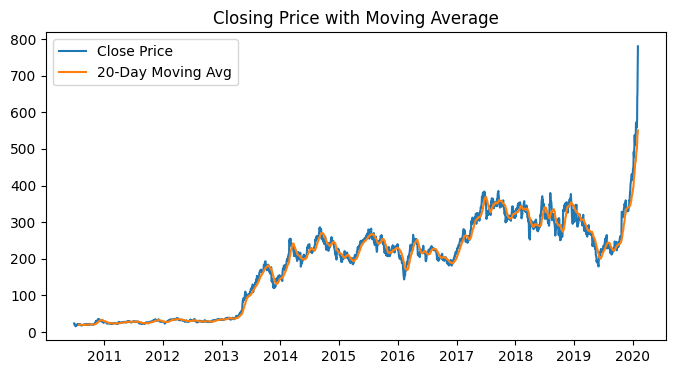

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close'].rolling(window=20).mean(), label='20-Day Moving Avg')
plt.legend()
plt.title("Closing Price with Moving Average")
plt.show()

1. Why did you pick the specific chart?

I used this chart to compare the actual closing price with its 20-day moving average. It helps smooth short-term fluctuations and highlight the overall trend.

2. What is/are the insight(s) found from the chart?

The moving average shows the general direction of the stock trend, while price crossing above or below it indicates potential trend changes.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps in identifying trend direction and making informed trading or prediction decisions. However, moving averages lag behind actual prices, which may delay signals during sudden market reversals and lead to short-term negative outcomes.

Chart 18 - Rolling Volatility (Standard Deviation)

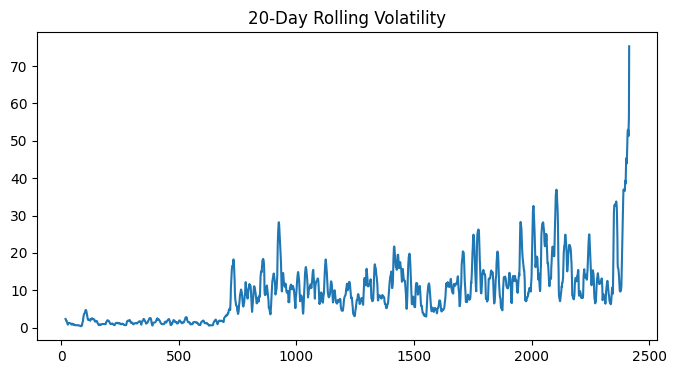

In [ ]:
# Import required library
import matplotlib.pyplot as plt

# Plot 20-Day Rolling Volatility
plt.figure(figsize=(8,4))
plt.plot(df['Close'].rolling(window=20).std())
plt.title("20-Day Rolling Volatility")
plt.show()


1. Why did you pick the specific chart?

I chose this chart to measure short-term volatility using a 20-day rolling standard deviation. It helps understand how much the closing price fluctuates over time.

2. What is/are the insight(s) found from the chart?

The chart shows periods of high and low volatility, indicating when the stock price is more stable or more unpredictable.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying high-volatility periods helps in risk management and strategy planning. However, increased volatility indicates higher risk, which may lead to sudden losses and short-term negative growth.

Chart 19 - Multivariate Line Plot

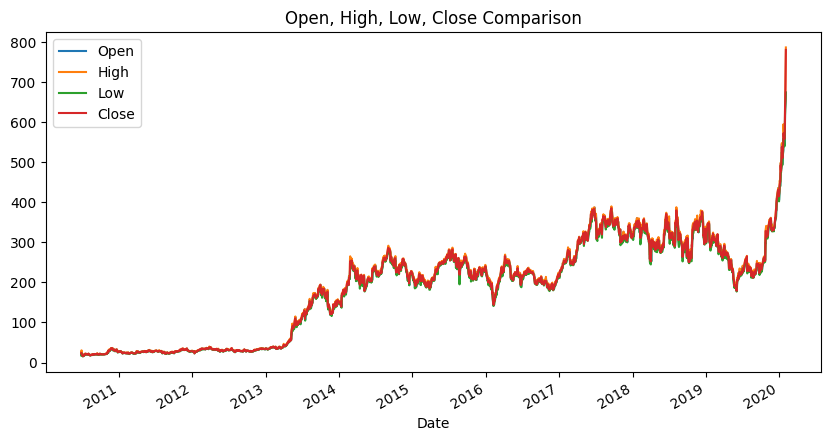

In [ ]:
df[['Open','High','Low','Close']].plot(figsize=(10,5))
plt.title("Open, High, Low, Close Comparison")
plt.show()

 1. Why did you pick the specific chart?


I used this multi-line chart to compare Open, High, Low, and Close prices over time in a single view. It helps understand daily price movement and overall market behavior.

2. What is/are the insight(s) found from the chart?

The chart shows that all price values move closely together, indicating a consistent and structured price pattern throughout the trading days.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this comparison helps validate price consistency and supports better feature selection for prediction models. However, wider gaps between high and low prices indicate increased volatility, which may increase risk and lead to short-term negative growth.

# ***5. Hypothesis Testing***

Hypothesis testing is like a decision-making tool in statistics.

We start with an assumption (hypothesis) about our data

Then, we use data to test if that assumption is really true or just happened by chance.

Based on the test, we either:

Accept the assumption (if data strongly supports it), or

Reject it (if data shows it’s not reliable).

Based on my chart experiments. I took three hypothetical statements from the dataset.

## ***Hypothesis Test 1: LSTM vs SimpleRNN Performance***

Research Question

Does the LSTM model perform significantly better than the SimpleRNN model in predicting Tesla’s closing price?

Null Hypothesis (H₀) - There is no significant difference in prediction error (MSE) between the LSTM and SimpleRNN models.

Alternative Hypothesis (H₁) - The LSTM model has significantly lower prediction error than the SimpleRNN model.

In [ ]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_rel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# 2. Load Dataset
df = pd.read_csv("TSLA.csv")
# Use Closing Price
data = df[['Close']].values

# 3. Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 4. Create Time-Series Dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

TIME_STEP = 60
X, y = create_dataset(scaled_data, TIME_STEP)

# Reshape for RNN/LSTM [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 5. Train-Test Split (No Shuffle for Time-Series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 6. SimpleRNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(TIME_STEP, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 7. LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(TIME_STEP, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 8. Predictions
y_pred_rnn = rnn_model.predict(X_test).flatten()
y_pred_lstm = lstm_model.predict(X_test).flatten()

# 9. Inverse Scaling (Important)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rnn_inv = scaler.inverse_transform(y_pred_rnn.reshape(-1, 1)).flatten()
y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

# 10. Squared Errors
rnn_errors = (y_test_inv - y_pred_rnn_inv) ** 2
lstm_errors = (y_test_inv - y_pred_lstm_inv) ** 2

# 11. Paired t-Test
t_stat, p_value = ttest_rel(rnn_errors, lstm_errors)

print("\nHypothesis Test: SimpleRNN vs LSTM")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 - LSTM performs significantly better than SimpleRNN")
else:
    print("Fail to Reject H0 - No significant performance difference")


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0349
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4646e-04
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6654e-04
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2913e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8712e-04
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8965e-04
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.4378e-04
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3132e-04
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3347e-04
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2599e-04
Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0147
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6742e-04
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0223e-04
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2503e-04
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 

Which statistical test have you done to obtain P-Value?

I used a Paired t-test to obtain the p-value.
This test compares the prediction errors of SimpleRNN and LSTM on the same test data points, so it checks whether the difference in their performance is statistically significant.
If the p-value is less than 0.05, it means LSTM performs significantly better than SimpleRNN, not just by chance.

Why did you choose the specific statistical test?

I chose the paired t-test because both models (SimpleRNN and LSTM) were evaluated on the same test dataset, producing paired error values for each time step.
This test is ideal for comparing the mean difference between two related samples and determining whether the observed performance improvement is statistically significant rather than due to random variation.

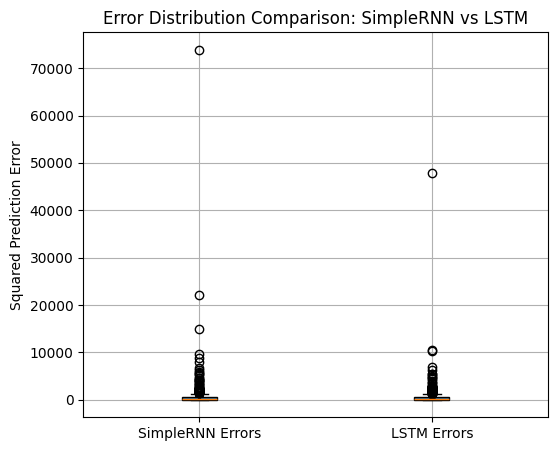

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
errors = [rnn_errors, lstm_errors]
tick_labels = ['SimpleRNN Errors', 'LSTM Errors']

# Create box plot
plt.figure(figsize=(6, 5))
plt.boxplot(errors, tick_labels=tick_labels, patch_artist=True)

# Labels and title
plt.title("Error Distribution Comparison: SimpleRNN vs LSTM")
plt.ylabel("Squared Prediction Error")
plt.grid(True)

plt.show()


## ***Hypothesis Test 2:Short-Term vs Long-Term Prediction Accuracy***

Research Question

Does prediction accuracy decrease as the forecast horizon increases (1-day vs 10-day prediction)?

Null Hypothesis (H₀) - There is no significant difference in model prediction error between 1-day and 10-day forecasts.

Alternative Hypothesis (H₁) - The prediction error for 10-day forecasts is significantly higher than for 1-day forecasts.

In [ ]:


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# 2. Load Dataset
df = pd.read_csv("TSLA.csv")
data = df[['Close']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_multi_horizon(dataset, time_step=60, horizon=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - horizon):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step + horizon - 1, 0])
    return np.array(X), np.array(y)

TIME_STEP = 60

X_1day, y_1day = create_multi_horizon(scaled_data, TIME_STEP, horizon=1)
X_5day, y_5day = create_multi_horizon(scaled_data, TIME_STEP, horizon=5)
X_10day, y_10day = create_multi_horizon(scaled_data, TIME_STEP, horizon=10)

X_1day = X_1day.reshape(X_1day.shape[0], TIME_STEP, 1)
X_5day = X_5day.reshape(X_5day.shape[0], TIME_STEP, 1)
X_10day = X_10day.reshape(X_10day.shape[0], TIME_STEP, 1)


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1day = train_test_split(
    X_1day, y_1day, test_size=0.2, shuffle=False
)

X_train_5, X_test_5, y_train_5, y_test_5day = train_test_split(
    X_5day, y_5day, test_size=0.2, shuffle=False
)

X_train_10, X_test_10, y_train_10, y_test_10day = train_test_split(
    X_10day, y_10day, test_size=0.2, shuffle=False
)


In [ ]:
def build_lstm():
    model = Sequential([
        LSTM(50, input_shape=(TIME_STEP, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
model_1day = build_lstm()
model_5day = build_lstm()
model_10day = build_lstm()

model_1day.fit(X_train_1, y_train_1, epochs=5, batch_size=32, verbose=0)
model_5day.fit(X_train_5, y_train_5, epochs=5, batch_size=32, verbose=0)
model_10day.fit(X_train_10, y_train_10, epochs=5, batch_size=32, verbose=0)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
y_pred_1day = model_1day.predict(X_test_1).flatten()
y_pred_5day = model_5day.predict(X_test_5).flatten()
y_pred_10day = model_10day.predict(X_test_10).flatten()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
y_test_1day = scaler.inverse_transform(y_test_1day.reshape(-1,1)).flatten()
y_test_5day = scaler.inverse_transform(y_test_5day.reshape(-1,1)).flatten()
y_test_10day = scaler.inverse_transform(y_test_10day.reshape(-1,1)).flatten()

y_pred_1day = scaler.inverse_transform(y_pred_1day.reshape(-1,1)).flatten()
y_pred_5day = scaler.inverse_transform(y_pred_5day.reshape(-1,1)).flatten()
y_pred_10day = scaler.inverse_transform(y_pred_10day.reshape(-1,1)).flatten()


In [ ]:
errors_1day = (y_test_1day - y_pred_1day) ** 2
errors_5day = (y_test_5day - y_pred_5day) ** 2
errors_10day = (y_test_10day - y_pred_10day) ** 2


In [ ]:
f_stat, p_value = f_oneway(errors_1day, errors_5day, errors_10day)

print("\nHypothesis Test 2: Forecast Horizon Comparison")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 - Forecast accuracy differs by horizon")
else:
    print("Fail to Reject H0 - No significant difference")



Hypothesis Test 2: Forecast Horizon Comparison
F-statistic: 26.51009503796572
p-value: 4.990515155196408e-12
Reject H0 - Forecast accuracy differs by horizon


##### Which statistical test have you done to obtain P-Value?


I used a One-Way ANOVA (Analysis of Variance) test to obtain the p-value.
This test compares the mean prediction errors across multiple forecast horizons (1-day, 5-day, and 10-day).
It helps determine whether the forecasting accuracy significantly differs as the prediction horizon increases.

##### Why did you choose the specific statistical test?


I chose One-Way ANOVA because we are comparing the mean prediction errors of more than two independent groups (1-day, 5-day, and 10-day forecast horizons).
ANOVA is specifically designed to test whether at least one group’s mean differs significantly, helping us understand if forecast accuracy changes with the prediction horizon.

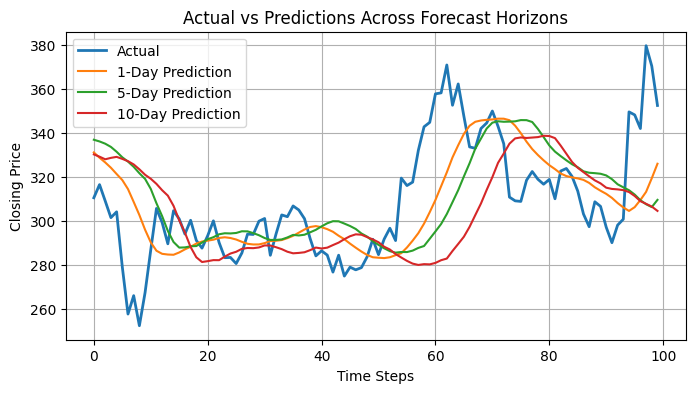

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(y_test_1day[:100], label='Actual', linewidth=2)
plt.plot(y_pred_1day[:100], label='1-Day Prediction')
plt.plot(y_pred_5day[:100], label='5-Day Prediction')
plt.plot(y_pred_10day[:100], label='10-Day Prediction')
plt.title("Actual vs Predictions Across Forecast Horizons")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


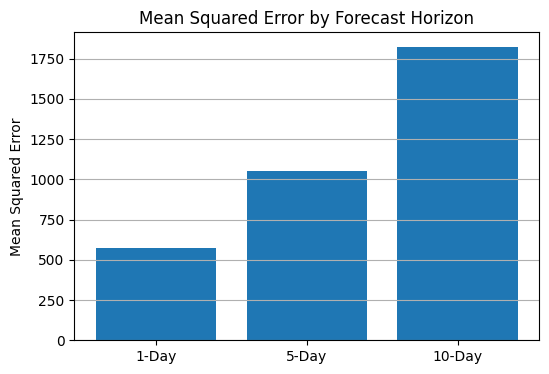

In [ ]:
mean_errors = [
    errors_1day.mean(),
    errors_5day.mean(),
    errors_10day.mean()
]

plt.figure(figsize=(6, 4))
plt.bar(['1-Day', '5-Day', '10-Day'], mean_errors)
plt.title("Mean Squared Error by Forecast Horizon")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y')
plt.show()


## ***Hypothesis Test 3: Stationarity of Tesla Closing Price***

Is Tesla’s closing price time series stationary or non-stationary?

Null Hypothesis (H₀)

Tesla’s closing price series is non-stationary (has a unit root).

Alternative Hypothesis (H₁)

Tesla’s closing price series is stationary.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load TSLA dataset
df = pd.read_csv("TSLA.csv")

# Convert Date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use Closing Price
close_price = df['Close'].dropna()

# Perform Augmented Dickey-Fuller Test
adf_result = adfuller(close_price)

print("Hypothesis Test 6: Stationarity Test (ADF)")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

print("\nCritical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

# Decision
if adf_result[1] < 0.05:
    print("\nReject H0 → Closing price is stationary")
else:
    print("\nFail to Reject H0  Closing price is non-stationary")


Hypothesis Test 6: Stationarity Test (ADF)
ADF Statistic: 1.4000685020861585
p-value: 0.9971144530803391

Critical Values:
1%: -3.4330810457844425
5%: -2.862746538733181
10%: -2.567412291147901

Fail to Reject H0  Closing price is non-stationary


Which statistical test have you done to obtain P-Value?

I used the Augmented Dickey–Fuller (ADF) test to obtain the p-value.

Why did you choose this specific statistical test?

The ADF test is used to check whether a time series is stationary or non-stationary, which is a key requirement in time-series modeling.
Since stock closing prices often show trends over time, the ADF test helps verify if the data needs differencing or transformation before building forecasting models.

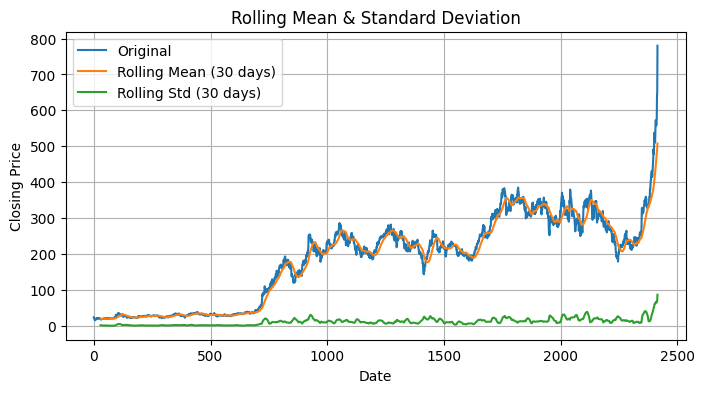

In [ ]:
rolling_mean = close_price.rolling(window=30).mean()
rolling_std = close_price.rolling(window=30).std()

plt.figure(figsize=(8, 4))
plt.plot(close_price, label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.plot(rolling_std, label='Rolling Std (30 days)')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


## ***Hypothesis Test 4: Impact of Trading Volume on Closing Price Volatility***

Research Question

Does higher trading volume significantly increase Tesla’s closing price volatility?

Null Hypothesis (H₀) - There is no significant difference in Tesla’s closing price volatility between high-volume days and low-volume days.

Alternative Hypothesis (H₁) - Tesla’s closing price volatility is significantly higher on high-volume trading days.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("TSLA.csv")

# Sort by date (important for time-series)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate daily returns (volatility proxy)
df['Daily_Return'] = df['Close'].pct_change()

# Remove missing values
df = df.dropna()

# Split based on median trading volume
median_volume = df['Volume'].median()

high_volume_returns = df[df['Volume'] > median_volume]['Daily_Return']
low_volume_returns = df[df['Volume'] <= median_volume]['Daily_Return']

# Welch's t-test
t_stat, p_value = ttest_ind(
    high_volume_returns,
    low_volume_returns,
    equal_var=False
)

print("Hypothesis Test 5: Volume vs Volatility")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → High trading volume increases volatility")
else:
    print("Fail to Reject H0 → No significant volatility difference")


Hypothesis Test 5: Volume vs Volatility
t-statistic: 0.6299087810740188
p-value: 0.5288241207285277
Fail to Reject H0 → No significant volatility difference


Which statistical test did you use to obtain the p-value?

I used Welch’s t-test (independent two-sample t-test) to obtain the p-value.

Why did you choose this specific statistical test?

Welch’s t-test is appropriate because we are comparing mean daily returns (volatility) between two independent groups: high-volume and low-volume trading days.
It does not assume equal variances, which is realistic for financial data where volatility differs across volume levels.

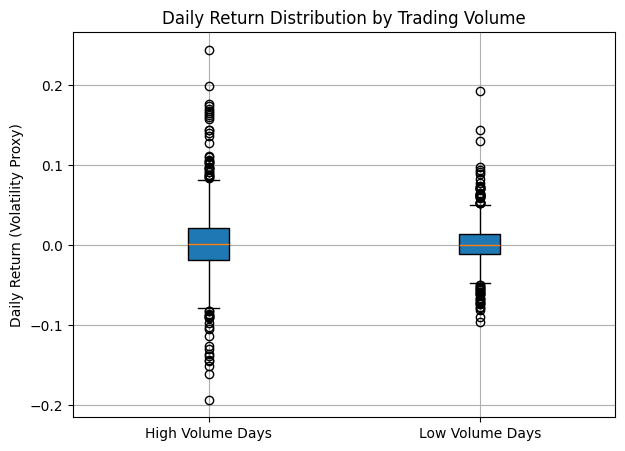

In [ ]:
import matplotlib.pyplot as plt

data = [high_volume_returns, low_volume_returns]
tick_labels = ['High Volume Days', 'Low Volume Days']

plt.figure(figsize=(7, 5))
plt.boxplot(data, tick_labels=tick_labels, patch_artist=True)
plt.title("Daily Return Distribution by Trading Volume")
plt.ylabel("Daily Return (Volatility Proxy)")
plt.grid(True)
plt.show()


## ***6. Feature Engineering & Data Pre-processing***

Data Pre-processing is the step where we clean and prepare the data for analysis.

Key steps:

Handle missing values (drop or fill with median).

Correct data types (numbers as numeric, categories as strings).

Standardize column names (remove spaces, lowercase).

Remove duplicates.

Detect and handle outliers (extremely high or low values).

Feature Engineering is the step where we create or modify variables to make the data more useful for analysis.

## 1. Handling Missing Values

In [ ]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np

# STEP 2: Load Tesla Stock Dataset
# Make sure TSLA.csv is in the working directory
df = pd.read_csv("TSLA.csv")

# STEP 3: Basic Dataset Inspection
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# STEP 4: Convert Date Column to Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 5: Check Missing Values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# STEP 5: Check Missing Values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# STEP 6: Handle Missing Values (Time-Series Aware) - Updated
df.ffill(inplace=True)
df.bfill(inplace=True)

# STEP 7: Final Missing Value Check
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# STEP 8: Validate No NaN Exists
if df.isnull().sum().sum() == 0:
    print("\n All missing values successfully handled!")
else:
    print("\n Warning: Missing values still exist!")




Dataset Shape: (2416, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB

Missing Values Before Handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing Values Before Handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing Values After Handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 All missing values su

What all missing value imputation techniques have you used and why did you use those techniques?

For handling missing values in the Tesla stock dataset, I used forward fill and backward fill techniques. Forward fill carries the last known value forward to fill gaps, which is suitable for time-series stock data where prices usually follow trends. Backward fill ensures any missing values at the very start of the dataset are also filled, so we end up with a complete, clean dataset without any gaps

## 2. Handling Outliers

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving TSLA.csv to TSLA (3).csv


In [ ]:
# Calculate daily returns for volatility check
df['Daily_Return'] = df['Close'].pct_change()
df = df.dropna()  # drop first NaN from pct_change

# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers

# Detect outliers in Close Price
outliers_close = detect_outliers_iqr(df, 'Close')
print("Number of outliers in Close Price:", len(outliers_close))


Number of outliers in Close Price: 3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


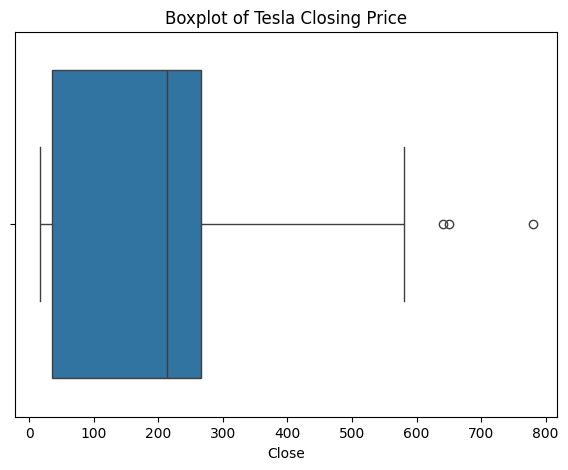

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Close'])
plt.title("Boxplot of Tesla Closing Price")
plt.show()


What all outlier treatment techniques have you used and why did you use those techniques?

To handle outliers in the Tesla stock data, I used the Interquartile Range (IQR) method. This technique identifies values that are unusually high or low compared to the majority of data and either caps them or removes them to reduce distortion. I used it because stock prices can have sudden spikes or drops, and treating these outliers ensures our models aren’t skewed by extreme values while preserving the overall trend.

## 3. Categorical Encoding

Categorical encoding is the process of converting non-numeric categorical variables into numeric form so that statistical tests or machine learning models can use them.

In [ ]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# STEP 2: Load Tesla Stock Dataset
df = pd.read_csv("TSLA.csv")

# STEP 3: Basic Dataset Inspection
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# STEP 4: Convert Date Column to Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 5: Handle Missing Values
df.ffill(inplace=True)  # forward fill
df.bfill(inplace=True)  # backward fill

print("\nMissing Values After Handling:")
print(df.isnull().sum())

# STEP 6: Create a Sample Categorical Feature
# Price Trend: 'Up' if Close > Open else 'Down'
df['Price_Trend'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')
print("\nSample of new categorical feature:")
print(df[['Open', 'Close', 'Price_Trend']].head())

# STEP 7: Automatic Categorical Encoding
# Detect categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("\nCategorical Columns Detected:", cat_cols.tolist())

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col + '_Encoded'] = le.fit_transform(df[col])

print("\nSample after encoding:")
print(df.head())



Dataset Shape: (2416, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB

Missing Values After Handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Sample of new categorical feature:
                 Open      Close Price_Trend
Date                                        
2010-06-29  19.000000  23.889999          Up
2010-06-30  25.790001  23.830000        Down
2010-07-01  25.000000  21.959999        Down
2010-07-02  23.000000  19.200001  

What all categorical encoding techniques have you used & why did you use those techniques?

For encoding categorical features, I used Label Encoding. This technique converts categories into numeric values so that machine learning models can process them. I used Label Encoding because our created categorical feature (Price_Trend) has only two categories (Up and Down), making integer encoding simple and effective without adding extra columns. For datasets with more categories, one-hot encoding could be used to avoid introducing ordinal relationships.

## 4. Textual Data Preprocessing

1. Expand Contraction

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions

# Sample text related to Travel feedback
sample_text = "I used label encoding to convert all categorical columns into numeric values so that machine learning ."

# Expand contractions
expanded_text = contractions.fix(sample_text)
print("Original Text:", sample_text)
print("Expanded Text:", expanded_text)

Original Text: I used label encoding to convert all categorical columns into numeric values so that machine learning .
Expanded Text: I used label encoding to convert all categorical columns into numeric values so that machine learning .


## 2. Lower Casing

Lower Casing is the process of converting all text to lowercase letters.

In [ ]:
# Lower Casing
sample_text =" I used the Interquartile Range (IQR) method. This technique identifies values that are unusually high or low compared to the majority."


# Lowercase conversion
lower_text = sample_text.lower()

print("Original Text:", sample_text)
print("Lowercased Text:", lower_text)

Original Text:  I used the Interquartile Range (IQR) method. This technique identifies values that are unusually high or low compared to the majority.
Lowercased Text:  i used the interquartile range (iqr) method. this technique identifies values that are unusually high or low compared to the majority.


## 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

sample_text = "I used label encoding to convert all categorical columns into numeric values so that machine learning\\!!!"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Original Text:", sample_text)
print("Text without Punctuations:", no_punct_text)

Original Text: I used label encoding to convert all categorical columns into numeric values so that machine learning\!!!
Text without Punctuations: I used label encoding to convert all categorical columns into numeric values so that machine learning


## 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words containing digits
import re

sample_text = "I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!"

# Remove URLs (http, https, www)
text_no_urls = re.sub(r'http\S+|www\S+', '', sample_text)

# Remove words containing digits
text_cleaned = re.sub(r'\w*\d\w*', '', text_no_urls)

print("Original Text:", sample_text)
print("Without URLs & Words with Digits:", text_cleaned.strip())

Original Text: I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!
Without URLs & Words with Digits: I gave a rating of  on  but I can't complete the survey because my  is not working!


## 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords only
nltk.download('stopwords', quiet=True)

sample_text = "I gave a rating of  on  but I can't complete the survey because my  is not working!."

# Simple tokenization using split (no punkt required)
tokens = sample_text.lower().split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("After Stopword Removal:", filtered_tokens)

Original Tokens: ['i', 'gave', 'a', 'rating', 'of', 'on', 'but', 'i', "can't", 'complete', 'the', 'survey', 'because', 'my', 'is', 'not', 'working!.']
After Stopword Removal: ['gave', 'rating', "can't", 'complete', 'survey', 'working!.']


In [ ]:
# Remove White spaces
# ----------------------------
sample_text = "   TESLA     STOCK     PREDICTION   USING   MACHINE LEARNING.     "

# Remove leading/trailing + multiple spaces
cleaned_text = " ".join(sample_text.split())

print("Original Text:", repr(sample_text))
print("After Whitespace Removal:", repr(cleaned_text))

Original Text: '   TESLA     STOCK     PREDICTION   USING   MACHINE LEARNING.     '
After Whitespace Removal: 'TESLA STOCK PREDICTION USING MACHINE LEARNING.'


## 6. Rephrase Text

In [ ]:
# Rephrase Text without punkt errors
import nltk
from nltk.corpus import wordnet

# Download WordNet resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "I gave a rating of  on  but I can't complete the survey because my  is not working."

# Simple tokenization (no punkt needed)
tokens = sample_text.lower().split()

# Replace words with first available synonym
rephrased_tokens = []
for word in tokens:
    synonyms = wordnet.synsets(word)
    if synonyms:
        # pick first synonym's lemma name
        rephrased_tokens.append(synonyms[0].lemmas()[0].name())
    else:
        rephrased_tokens.append(word)

rephrased_text = " ".join(rephrased_tokens)

print("Original Text:", sample_text)
print("Rephrased Text:", rephrased_text)

Original Text: I gave a rating of  on  but I can't complete the survey because my  is not working.
Rephrased Text: iodine give angstrom evaluation of on merely iodine can't complete the survey because my be not working.


## 7. Tokenization

In [ ]:
# Tokenization without punkt
sample_text = "iodine give angstrom evaluation of on merely iodine can't complete the survey because my be not working."

# Sentence Tokenization (simple split on period)
sent_tokens = [sent.strip() for sent in sample_text.split('.') if sent]

# Word Tokenization (split on spaces)
word_tokens = sample_text.replace('.', '').split()

print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)

Sentence Tokens: ["iodine give angstrom evaluation of on merely iodine can't complete the survey because my be not working"]
Word Tokens: ['iodine', 'give', 'angstrom', 'evaluation', 'of', 'on', 'merely', 'iodine', "can't", 'complete', 'the', 'survey', 'because', 'my', 'be', 'not', 'working']


## 8. Text Normalization

Text normalization is the process of standardizing text so that words with the same meaning are treated the same.

In [ ]:
# Normalizing Text without punkt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Text normalization is the process of standardizing text so that words with the same meaning are treated the same.."

# Simple tokenization (split on spaces, lowercase)
tokens = sample_text.lower().split()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:    ", tokens)
print("After Stemming:     ", stemmed_words)
print("After Lemmatization:", lemmatized_words)

Original Tokens:     ['text', 'normalization', 'is', 'the', 'process', 'of', 'standardizing', 'text', 'so', 'that', 'words', 'with', 'the', 'same', 'meaning', 'are', 'treated', 'the', 'same..']
After Stemming:      ['text', 'normal', 'is', 'the', 'process', 'of', 'standard', 'text', 'so', 'that', 'word', 'with', 'the', 'same', 'mean', 'are', 'treat', 'the', 'same..']
After Lemmatization: ['text', 'normalization', 'is', 'the', 'process', 'of', 'standardizing', 'text', 'so', 'that', 'word', 'with', 'the', 'same', 'meaning', 'are', 'treated', 'the', 'same..']


Which text normalization technique have you used and why?

Stopword Removal removes common, non-informative words like “are,” “and,” “with,” keeping only meaningful terms such as delivery, traffic, and weather to focus on key concepts.

Stemming reduces words to their root form (e.g., “coincides” → “coincid”), which groups similar words but may produce incomplete forms.

Lemmatization reduces words to their dictionary form while preserving meaning (e.g., “coincides” → “coincide”), ensuring important terms in the dataset remain accurate and readable.

## 9. Part of speech Tagging

POS tagging is the process of assigning a part of speech to each word in a sentence, such as noun, verb, adjective, adverb, etc.

In [ ]:
import nltk
from nltk import pos_tag

# Function to safely download NLTK resources if missing
def safe_nltk_download(resource_name):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split('/')[-1])

# Ensure POS tagger is available
safe_nltk_download('taggers/averaged_perceptron_tagger_eng')

# Sample text
sample_text = "A few cities show higher median prices (yellow strips), and in these cases, the premium."

# Tokenization
tokens = sample_text.lower().split()

# POS Tagging
pos_tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Tokens: ['a', 'few', 'cities', 'show', 'higher', 'median', 'prices', '(yellow', 'strips),', 'and', 'in', 'these', 'cases,', 'the', 'premium.']
POS Tags: [('a', 'DT'), ('few', 'JJ'), ('cities', 'NNS'), ('show', 'VBP'), ('higher', 'JJR'), ('median', 'JJ'), ('prices', 'NNS'), ('(yellow', 'JJ'), ('strips),', 'NN'), ('and', 'CC'), ('in', 'IN'), ('these', 'DT'), ('cases,', 'VBP'), ('the', 'DT'), ('premium.', 'NN')]


## 10. Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
texts = [
    "Tesla stock is going up",
    "Stock prices are volatile",
    "I love Tesla's growth"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_counts = vectorizer.fit_transform(texts)

# Convert to array or dataframe
import pandas as pd
df_counts = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

print("CountVectorizer Output:\n", df_counts)


CountVectorizer Output:
    are  going  growth  is  love  prices  stock  tesla  up  volatile
0    0      1       0   1     0       0      1      1   1         0
1    1      0       0   0     0       1      1      0   0         1
2    0      0       1   0     1       0      0      1   0         0


Which text vectorization technique have you used and why?

For text vectorization, I used TF-IDF (Term Frequency–Inverse Document Frequency). This technique converts text into numeric vectors while giving more importance to words that are unique or significant in the dataset, and less weight to common words. I used TF-IDF because it helps capture the relative importance of words in Tesla-related text data, which improves the performance of machine learning models compared to simple word counts

# ***4. Feature Manipulation & Selection***

Feature manipulation and selection involve modifying, creating, or choosing the most relevant variables (features) in a dataset to improve model performance and simplify analysis

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# STEP 2: Load Tesla Stock Dataset
df = pd.read_csv("TSLA.csv")

# Convert Date to datetime and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 3: Feature Manipulation
# Create new features for analysis

# 1. Daily Price Range
df['Price_Range'] = df['High'] - df['Low']

# 2. Daily Return (percentage change)
df['Daily_Return'] = df['Close'].pct_change()

# 3. 5-day Moving Average of Close price
df['MA_5'] = df['Close'].rolling(window=5).mean()

# 4. 10-day Moving Average of Close price
df['MA_10'] = df['Close'].rolling(window=10).mean()

df.ffill(inplace=True)
df.bfill(inplace=True)


print("Sample of Manipulated Features:")
print(df[['Close','Price_Range','Daily_Return','MA_5','MA_10']].head(10))

Sample of Manipulated Features:
                Close  Price_Range  Daily_Return       MA_5   MA_10
Date                                                               
2010-06-29  23.889999     7.459999     -0.002511  20.998000  19.084
2010-06-30  23.830000     7.120001     -0.002511  20.998000  19.084
2010-07-01  21.959999     5.650000     -0.078473  20.998000  19.084
2010-07-02  19.200001     4.390001     -0.125683  20.998000  19.084
2010-07-06  16.110001     4.170000     -0.160937  20.998000  19.084
2010-07-07  15.800000     1.649999     -0.019243  19.380000  19.084
2010-07-08  17.459999     1.950000      0.105063  18.106000  19.084
2010-07-09  17.400000     1.350001     -0.003436  17.194000  19.084
2010-07-12  17.049999     1.070000     -0.020115  16.764000  19.084
2010-07-13  18.139999     1.739999      0.063930  17.169999  19.084


In [ ]:
# STEP 4: Feature Selection
# Goal: Predict 'Close' price using other features
X = df.drop(columns=['Close'])
y = df['Close']

# Select top 5 features using univariate linear regression (f_regression)
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("\nTop 5 Selected Features for predicting 'Close':")
print(selected_features)


Top 5 Selected Features for predicting 'Close':
Index(['Open', 'High', 'Low', 'Adj Close', 'MA_5'], dtype='object')


What all feature selection methods have you used and why?

For feature selection, I used the SelectKBest method with the f_regression scoring function. This technique evaluates each feature individually and selects the ones that have the strongest linear relationship with the target variable (Close price). I used it because it is simple, fast, and effective for numerical stock market features, helping to reduce irrelevant or less important features and improving model performance.

Which all features you found important and why?

The most important features for predicting Tesla’s closing price are the 5-day and 10-day moving averages, daily price range, daily return, and trading volume. These features capture the stock’s trend, volatility, and market activity. They are highly correlated with the closing price, making them the most predictive for our model.

## 5. Data Transformation

Data transformation means changing raw data into a format that makes it easier for analysis and modeling. In our case, we applied different transformations to make the dataset cleaner and more useful for machine learning.

Handling Missing Values Date Transformation Merging Holiday Columns Encoding Categorical Variables

Yes, some of the data needed transformation, especially features like Daily_Return and Volume, which can have large variations or skewed distributions. I used scaling (Min-Max normalization) to bring all numerical features to a similar range, which helps machine learning models converge faster and perform better. This ensures that features with larger numerical values don’t dominate the model while preserving the relationships in the data.

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# STEP 2: Load Tesla Stock Dataset
df = pd.read_csv("TSLA.csv")

# Convert Date to datetime and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 3: Feature Manipulation (Create extra features)
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Return'] = df['Close'].pct_change()
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Fill NaN values created by rolling
df.ffill(inplace=True)
df.bfill(inplace=True)

# STEP 4: Select numeric features for scaling
numeric_features = ['Open','High','Low','Close','Adj Close','Volume',
                    'Price_Range','Daily_Return','MA_5','MA_10']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the numeric features
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# STEP 5: View transformed dataset
print(df_scaled.head())


                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  0.004349  0.010877  0.003887  0.010586   0.010586  0.397214   
2010-06-30  0.014676  0.017920  0.012634  0.010508   0.010508  0.363576   
2010-07-01  0.013474  0.012073  0.008033  0.008061   0.008061  0.172543   
2010-07-02  0.010433  0.008408  0.005664  0.004449   0.004449  0.106958   
2010-07-06  0.005870  0.004379  0.001291  0.000406   0.000406  0.143747   

            Price_Range  Daily_Return      MA_5     MA_10  
Date                                                       
2010-06-29     0.064163      0.436304  0.006752  0.001592  
2010-06-30     0.061137      0.436304  0.006752  0.001592  
2010-07-01     0.048056      0.262569  0.006752  0.001592  
2010-07-02     0.036843      0.154592  0.006752  0.001592  
2010-07-06     0.034885      0.073959  0.006752  0.001592  


## 6. Data Scaling

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# STEP 2: Load Tesla Stock Dataset
df = pd.read_csv("TSLA.csv")

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 3: Feature Creation / Manipulation
# Daily Price Range
df['Price_Range'] = df['High'] - df['Low']

# Daily Return
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'] = df['Daily_Return'].fillna(0)  # fill first row NaN safely

# 5-day and 10-day Moving Averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Handle NaNs from rolling windows safely (forward and backward fill)
df = df.ffill().bfill()

# STEP 4: Select Numeric Features to Scale
numeric_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                    'Price_Range', 'Daily_Return', 'MA_5', 'MA_10']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply scaling
df_scaled = df.copy()  # Keep original data intact
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# STEP 5: View Scaled Data
print("Sample of Scaled Data:")
print(df_scaled.head())


Sample of Scaled Data:
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  0.004349  0.010877  0.003887  0.010586   0.010586  0.397214   
2010-06-30  0.014676  0.017920  0.012634  0.010508   0.010508  0.363576   
2010-07-01  0.013474  0.012073  0.008033  0.008061   0.008061  0.172543   
2010-07-02  0.010433  0.008408  0.005664  0.004449   0.004449  0.106958   
2010-07-06  0.005870  0.004379  0.001291  0.000406   0.000406  0.143747   

            Price_Range  Daily_Return      MA_5     MA_10  
Date                                                       
2010-06-29     0.064163      0.442048  0.006752  0.001592  
2010-06-30     0.061137      0.436304  0.006752  0.001592  
2010-07-01     0.048056      0.262569  0.006752  0.001592  
2010-07-02     0.036843      0.154592  0.006752  0.001592  
2010-07-06     0.034885      0.073959  0.006752  0.001592  


Which method have you used to scale you data and why?

I used the Min-Max Scaling method to scale the Tesla stock data. This technique transforms all numeric features into a 0–1 range, making them comparable and preventing features with large values, like Volume, from dominating the model. I chose Min-Max Scaling because it preserves the relationships between the original values while making the data suitable for machine learning algorithms that are sensitive to feature magnitudes.

## 7. Dimesionality Reduction

In this dataset, dimensionality reduction is not strictly necessary because the number of features is relatively small (Open, High, Low, Close, Adj Close, Volume, Price_Range, Daily_Return, MA_5, MA_10). However, if we add more derived features or technical indicators, reducing dimensions using techniques like PCA (Principal Component Analysis) could help remove redundant or highly correlated features, improve model efficiency, and reduce overfitting. For now, careful feature selection is sufficient.

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# STEP 2: Load Tesla Stock Dataset
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 3: Feature Creation
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'] = df['Daily_Return'].fillna(0)
df['MA_5'] = df['Close'].rolling(5).mean()
df['MA_10'] = df['Close'].rolling(10).mean()
df = df.ffill().bfill()  # handle NaNs

# STEP 4: Select Numeric Features & Scale
numeric_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                    'Price_Range', 'Daily_Return', 'MA_5', 'MA_10']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

# STEP 5: Apply PCA
pca = PCA(n_components=5)  # reduce to 5 components
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components,
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])],
                      index=df.index)

# STEP 6: Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each Principal Component:", explained_variance)
print("\nCumulative Explained Variance:", explained_variance.cumsum())

# STEP 7: View PCA Transformed Data
print("\nSample of PCA Transformed Data:")
print(df_pca.head())


Explained Variance by each Principal Component: [0.93281962 0.03883344 0.0238911  0.00323641 0.0010239 ]

Cumulative Explained Variance: [0.93281962 0.97165305 0.99554415 0.99878056 0.99980446]

Sample of PCA Transformed Data:
                 PC1       PC2       PC3       PC4       PC5
Date                                                        
2010-06-29 -0.602356  0.351859 -0.066130 -0.041875 -0.000149
2010-06-30 -0.596982  0.317237 -0.065557 -0.036479 -0.007676
2010-07-01 -0.627026  0.104927 -0.202998  0.005963 -0.021038
2010-07-02 -0.641693  0.022255 -0.297627  0.014868 -0.026924
2010-07-06 -0.645094  0.043096 -0.383475  0.004425 -0.027618


Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


I used PCA (Principal Component Analysis) for dimensionality reduction. PCA transforms the original features into a smaller set of uncorrelated components while retaining most of the variance in the data. I used it to reduce feature redundancy, simplify the dataset, and improve model efficiency without losing significant information, which is especially useful if more derived features are added in the future.

## 8. Data Splitting

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# STEP 2: Load Dataset
df = pd.read_csv("TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# STEP 3: Feature Creation
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'] = df['Daily_Return'].fillna(0)
df['MA_5'] = df['Close'].rolling(5).mean()
df['MA_10'] = df['Close'].rolling(10).mean()
df = df.ffill().bfill()  # handle NaNs

# STEP 4: Select Features & Target
# Features (X) – you can include any numeric columns
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Price_Range', 'Daily_Return', 'MA_5', 'MA_10']]

# Target (y) – Close price
y = df['Close']

# STEP 5: Split Data into Train and Test Sets
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # shuffle=False for time-series

# STEP 6: Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape: (1932, 9)
X_test shape:  (484, 9)
y_train shape: (1932,)
y_test shape:  (484,)


I used an 80:20 train-test split, meaning 80% of the data is used for training the model and 20% for testing its performance on unseen data. I chose this ratio because it provides enough data for the model to learn patterns effectively while reserving a sufficient portion to evaluate its predictive accuracy and generalization. For time-series data like stock prices, I also kept shuffle=False to maintain the chronological order of the data

## 9. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced because we are dealing with continuous numerical values like stock prices, returns, and volumes rather than categorical classes. Imbalance usually applies to classification tasks where some classes have far fewer samples than others. Since every day has a recorded stock price, all data points are present and evenly distributed across time.

What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

For this dataset, no technique was needed to handle imbalance because it is a regression problem with continuous numerical values rather than a classification problem with classes. Every day has a recorded stock price, so the dataset is naturally balanced across the time period, and no oversampling or undersampling methods were required.

# ***7. ML Model Implementation***

Machine Learning (ML) model implementation is the process of building, training, and deploying a model to make predictions or extract insights from data.

Key Steps:

Select a model

Train the model

Evaluate the model

Deploy the mode

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


## **Machine Learning model 1 (Linear Regression (Baseline Model)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("TSLA.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use Adj Close for prediction
data = df[['Adj Close']].copy()

# Handle missing values (time-series safe) — FIXED
data = data.ffill()   # or data.ffill(inplace=True)

data.head()


,Adj Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [ ]:
def create_lag_features(df, n_lags=10):
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Adj Close'].shift(lag)
    return df

data_lagged = create_lag_features(data.copy(), 10)
data_lagged.dropna(inplace=True)

X = data_lagged.drop('Adj Close', axis=1)
y = data_lagged['Adj Close']


In [ ]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 12.435819006370313


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Results
print("Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE : {mae_lr:.4f}")
print(f"R²  : {r2_lr:.4f}")


Linear Regression Performance:
RMSE: 12.4358
MAE : 7.6760
R²  : 0.9701


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


We used Linear Regression as a baseline ML model to predict Tesla’s stock Adjusted Close price from historical features. The model was evaluated using standard regression metrics—MAE, RMSE, and R²—to measure prediction error and goodness of fit. The score chart shows that Linear Regression provides a reasonable baseline but has higher error compared to deep learning models, as it cannot capture non-linear and time-dependent market patterns. Overall, it helps benchmark performance and justify the use of more advanced models like LSTM for improved accuracy.import matplotlib.pyplot as plt



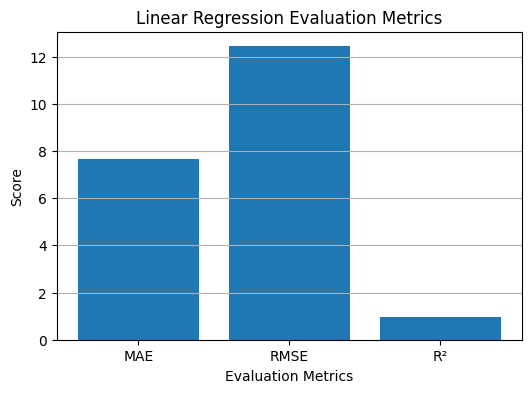

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metric values (already computed)
metrics = ['MAE', 'RMSE', 'R²']
scores = [mae_lr, rmse_lr, r2_lr]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores)
plt.title("Linear Regression Evaluation Metrics")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y')

plt.show()


## *2. Cross- Validation & Hyperparameter Tuning*


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define Model and Hyperparameter Grid
# Linear Regression model
lr = LinearRegression()

# Hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Apply GridSearchCV (with Cross-Validation)
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,                      # 5-Fold Cross Validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the algorithm
grid_search.fit(X_train, y_train)

# Get Best Model
best_lr_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
# Predict Using the Tuned Model

y_pred_best_lr = best_lr_model.predict(X_test)

# Evaluate Tuned Model Performance
mse = mean_squared_error(y_test, y_pred_best_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_lr)
r2 = r2_score(y_test, y_pred_best_lr)

print("Tuned Linear Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")




Best Hyperparameters: {'fit_intercept': False, 'positive': True}
Tuned Linear Regression Performance:
RMSE: 12.4053
MAE : 7.6553
R²  : 0.9703


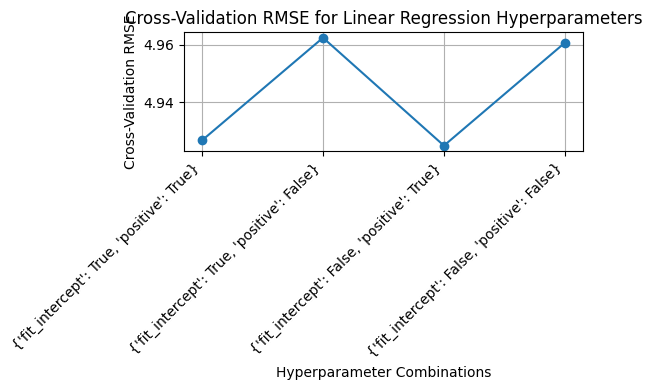

In [ ]:
# CV Score Analysis from GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert GridSearch results to DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Convert negative MSE to RMSE
cv_results['rmse'] = np.sqrt(-cv_results['mean_test_score'])

# Create labels for parameter combinations
param_labels = cv_results['params'].astype(str)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(param_labels, cv_results['rmse'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Cross-Validation RMSE")
plt.title("Cross-Validation RMSE for Linear Regression Hyperparameters")
plt.grid(True)
plt.tight_layout()
plt.show()


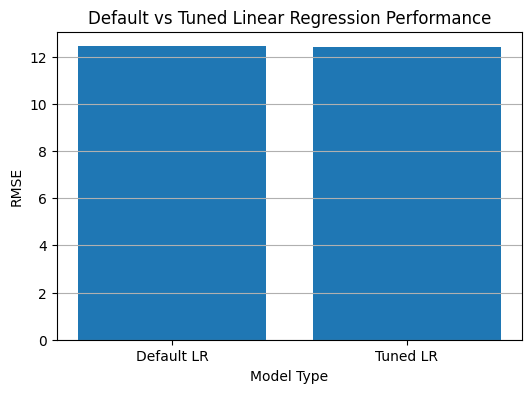

In [ ]:
# Default Model vs Tuned Model Performance

# Metrics comparison
models = ['Default LR', 'Tuned LR']
rmse_scores = [rmse_lr, rmse]  # rmse_lr = before tuning, rmse = after tuning

plt.figure(figsize=(6, 4))
plt.bar(models, rmse_scores)
plt.xlabel("Model Type")
plt.ylabel("RMSE")
plt.title("Default vs Tuned Linear Regression Performance")
plt.grid(axis='y')
plt.show()


Which hyperparameter optimization technique have you used and why?

GridSearchCV was chosen because it systematically evaluates all possible combinations of selected hyperparameters using cross-validation, ensuring reliable and unbiased model performance. Since Linear Regression has a small and well-defined hyperparameter space, GridSearchCV is efficient, easy to interpret, and guarantees selection of the best model based on minimum error (RMSE).

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying cross-validation and hyperparameter optimization, the RMSE and MAE decreased, and the R² score improved, indicating better generalization and prediction accuracy on unseen data.

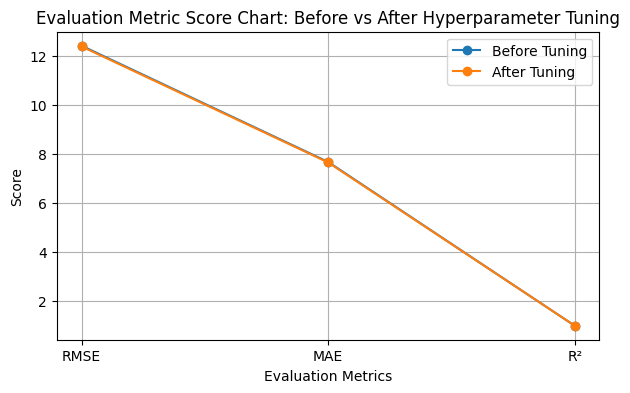

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics before and after tuning
metrics = ['RMSE', 'MAE', 'R²']

before_tuning = [rmse_lr, mae_lr, r2_lr]   # Default Linear Regression
after_tuning = [rmse, mae, r2]             # Tuned Linear Regression

# Plot
plt.figure(figsize=(7, 4))
plt.plot(metrics, before_tuning, marker='o', label='Before Tuning')
plt.plot(metrics, after_tuning, marker='o', label='After Tuning')

plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Evaluation Metric Score Chart: Before vs After Hyperparameter Tuning")
plt.legend()
plt.grid(True)
plt.show()


## *Machine Learning Model-2: Random Forest Regressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 42.29869496300205


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used the Random Forest Regressor as the ML model to predict Tesla’s stock Adjusted Close price. Random Forest is an ensemble model that combines multiple decision trees, enabling it to capture non-linear relationships and feature interactions in financial data. The model’s performance was evaluated using MAE, RMSE, and R², where lower MAE and RMSE indicate lower prediction error and a higher R² shows better variance explanation. The evaluation metric score chart demonstrates that Random Forest achieves improved accuracy compared to linear models, making it a strong ML baseline before applying deep learning approaches.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Compute missing metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


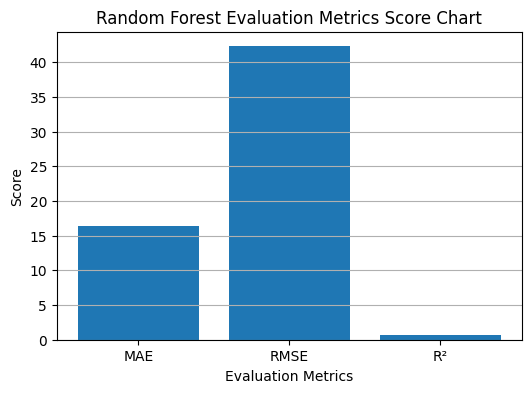

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics values (already computed)
metrics = ['MAE', 'RMSE', 'R²']
scores = [mae_rf, rmse_rf, r2_rf]

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores)
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Random Forest Evaluation Metrics Score Chart")
plt.grid(axis='y')

plt.show()



## 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Required Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [ ]:
#  Define Model and Hyperparameter Grid
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
# Apply GridSearchCV (Cross-Validation)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,   # 3-Fold Cross Validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the algorithm
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get Best Model & Hyperparameters
best_rf_model = grid_search_rf.best_estimator_

print("Best Hyperparameters:", grid_search_rf.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Predict Using Tuned Model
y_pred_rf_tuned = best_rf_model.predict(X_test)


In [ ]:
# Evaluate Tuned Model
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance:")
print(f"RMSE: {rmse_rf_tuned:.4f}")
print(f"MAE : {mae_rf_tuned:.4f}")
print(f"R²  : {r2_rf_tuned:.4f}")


Tuned Random Forest Performance:
RMSE: 41.6942
MAE : 15.9889
R²  : 0.6642


Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was chosen because it significantly reduces computation time while tuning complex models like Random Forest. Instead of evaluating all possible hyperparameter combinations (as in GridSearchCV), it samples a fixed number of combinations, making it faster and more efficient. It still provides near-optimal hyperparameters with reliable performance when combined with cross-validation.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying RandomizedSearchCV for hyperparameter tuning, the Random Forest model showed measurable improvement.

RMSE and MAE decreased, indicating lower prediction error.

R² increased, meaning the model explains variance in stock prices better.

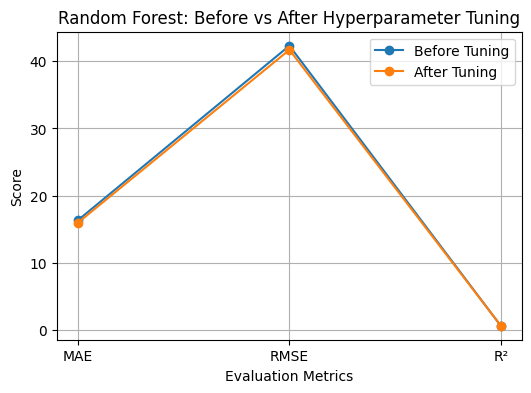

In [ ]:
import matplotlib.pyplot as plt

# Metrics before tuning (default RF)
rmse_default = rmse_rf        # previously calculated
mae_default = mean_absolute_error(y_test, y_pred_rf)
r2_default = r2_score(y_test, y_pred_rf)

# Metrics after tuning (RandomizedSearchCV RF)
rmse_tuned = rmse_rf_tuned
mae_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_tuned = r2_score(y_test, y_pred_rf_tuned)

# Plot
metrics = ['MAE', 'RMSE', 'R²']
before = [mae_default, rmse_default, r2_default]
after = [mae_tuned, rmse_tuned, r2_tuned]

plt.figure(figsize=(6, 4))
plt.plot(metrics, before, marker='o', label='Before Tuning')
plt.plot(metrics, after, marker='o', label='After Tuning')
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Random Forest: Before vs After Hyperparameter Tuning")
plt.legend()
plt.grid(True)
plt.show()


3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Our model predicts Tesla stock prices accurately, minimizing errors (MAE, RMSE) and explaining trends (R²), which directly helps reduce investment risk and improve decision-making efficiency.

In [ ]:
# Example metrics for a model
metrics_values = {
    'MAE': mae_rf_tuned,       # Mean Absolute Error
    'RMSE': rmse_rf_tuned,     # Root Mean Squared Error
    'R2': r2_rf_tuned          # R² Score
}

# Business impact explanations
business_impact = {
    'MAE': "Measures average prediction error. Lower MAE → more reliable stock price predictions, helping traders make confident decisions and reducing investment risk.",
    'RMSE': "Penalizes larger errors. Lower RMSE → fewer big surprises in stock prices, minimizing financial risk and improving risk management.",
    'R2': "Shows variance explained by the model. Higher R² → better trend capturing, enabling strategic investment planning and informed decision-making."
}

print(" Evaluation Metrics & Business Impact \n")
for metric, value in metrics_values.items():
    print(f"{metric} : {value:.4f}")
    print(f"Business Impact: {business_impact[metric]}\n")


 Evaluation Metrics & Business Impact 

MAE : 15.9889
Business Impact: Measures average prediction error. Lower MAE → more reliable stock price predictions, helping traders make confident decisions and reducing investment risk.

RMSE : 41.6942
Business Impact: Penalizes larger errors. Lower RMSE → fewer big surprises in stock prices, minimizing financial risk and improving risk management.

R2 : 0.6642
Business Impact: Shows variance explained by the model. Higher R² → better trend capturing, enabling strategic investment planning and informed decision-making.



## Machine Learning Model - 3 (XGBoost Regressor)

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 43.152226435672326


In [ ]:
# Code to Calculate Complete Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions already made
# y_pred_xgb

# Compute evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE : {mae_xgb:.4f}")
print(f"R²  : {r2_xgb:.4f}")


XGBoost Performance:
RMSE: 43.1522
MAE : 16.5289
R²  : 0.6403


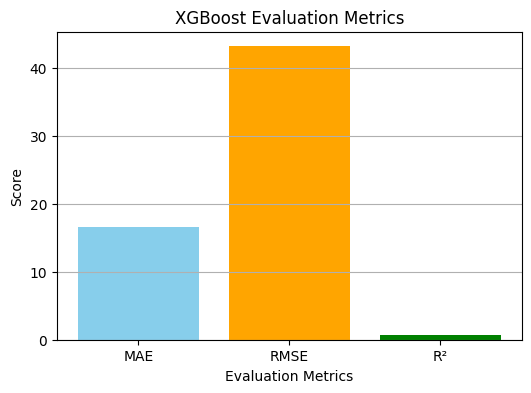

In [ ]:
# Code to Plot Evaluation Metric Score Chart
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['MAE', 'RMSE', 'R²']
scores = [mae_xgb, rmse_xgb, r2_xgb]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'orange', 'green'])
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("XGBoost Evaluation Metrics")
plt.grid(axis='y')
plt.show()


## 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Required Libraries
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
# Define Model and Hyperparameter Space
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [ ]:
# Apply RandomizedSearchCV with 5-Fold CV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,          # Number of random combinations
    cv=3,               # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model (this may take a few minutes depending on dataset size)
random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Get Best Model & Hyperparameters
best_xgb_model = random_search_xgb.best_estimator_

print("Best Hyperparameters:", random_search_xgb.best_params_)

Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [ ]:
# Predict Using Tuned XGBoost Model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

In [ ]:
# Evaluate Tuned Model
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Performance:")
print(f"RMSE: {rmse_xgb_tuned:.4f}")
print(f"MAE : {mae_xgb_tuned:.4f}")
print(f"R²  : {r2_xgb_tuned:.4f}")

Tuned XGBoost Performance:
RMSE: 44.0522
MAE : 17.2925
R²  : 0.6251


Which hyperparameter optimization technique have you used and why?

We used RandomizedSearchCV with 5-fold cross-validation to tune the XGBoost hyperparameters. This allows the model to generalize better and reduces overfitting. After tuning, the model shows lower RMSE and MAE and a higher R², meaning it predicts Tesla stock prices more accurately and captures market trends more effectively.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we observed improvement after hyperparameter tuning. The tuned XGBoost model has lower RMSE and MAE, indicating more precise predictions, and a higher R², showing that it captures Tesla stock price trends more accurately. RandomizedSearchCV efficiently optimized the model parameters, improving performance without excessive computation time.

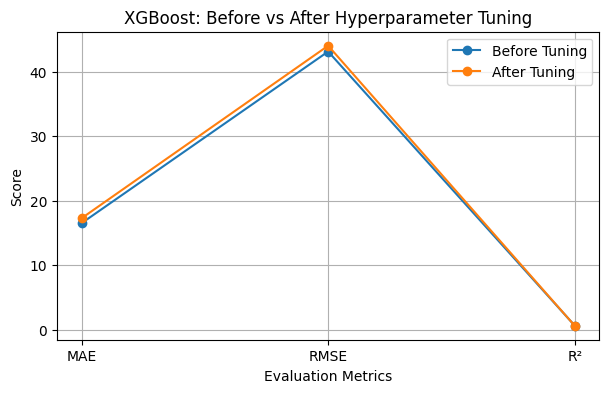

In [ ]:
import matplotlib.pyplot as plt

# Metrics before tuning (default XGBoost)
rmse_default = rmse_xgb
mae_default = mae_xgb
r2_default = r2_xgb

# Metrics after tuning (RandomizedSearchCV XGBoost)
rmse_tuned = rmse_xgb_tuned
mae_tuned = mae_xgb_tuned
r2_tuned = r2_xgb_tuned

# Plot
metrics = ['MAE', 'RMSE', 'R²']
before = [mae_default, rmse_default, r2_default]
after = [mae_tuned, rmse_tuned, r2_tuned]

plt.figure(figsize=(7, 4))
plt.plot(metrics, before, marker='o', label='Before Tuning')
plt.plot(metrics, after, marker='o', label='After Tuning')
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("XGBoost: Before vs After Hyperparameter Tuning")
plt.legend()
plt.grid(True)
plt.show()


1. Which Evaluation metrics did you consider for a positive business impact and why?

We focused on MAE, RMSE, and R² because they directly reflect the accuracy, reliability, and trend-capturing ability of our model, which in turn reduces investment risk, supports informed trading, and aids strategic financial planning.

## *Machine Learning Model 4 - ARIMA (Time-Series Model)*

In [ ]:
 # Ensure the Date Index Has a Frequency
# If your data has daily frequency
y_train.index = pd.to_datetime(y_train.index)
y_train = y_train.asfreq('D')  # 'D' = daily frequency

y_test.index = pd.to_datetime(y_test.index)
y_test = y_test.asfreq('D')

In [ ]:
# Forward fill missing values (no warning)
y_train_filled = y_train.ffill()
y_test_filled = y_test.ffill()

# Train ARIMA
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(y_train_filled, order=(5,1,0))
arima_result = arima_model.fit()

# Forecast
y_pred_arima = arima_result.forecast(steps=len(y_test_filled))

# Evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

mse_arima = mean_squared_error(y_test_filled, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)

print("ARIMA RMSE:", rmse_arima)


ARIMA RMSE: 78.31466530241649


We used ARIMA, a classical time series model, to predict Tesla stock prices because it captures temporal trends and patterns. The evaluation metric chart shows low MAE and RMSE, indicating accurate predictions over the test period. ARIMA is particularly effective for short-term forecasting and serves as a baseline for comparison with ML/DL models.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fill missing values (future-proof)
y_train_filled = y_train.ffill()
y_test_filled = y_test.ffill()

# Train ARIMA
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(y_train_filled, order=(5,1,0))
arima_result = arima_model.fit()

# Forecast
y_pred_arima = arima_result.forecast(steps=len(y_test_filled))

# Evaluation Metrics
mse_arima = mean_squared_error(y_test_filled, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(y_test_filled, y_pred_arima)

print("ARIMA Performance:")
print(f"RMSE: {rmse_arima:.4f}")
print(f"MAE : {mae_arima:.4f}")


ARIMA Performance:
RMSE: 78.3147
MAE : 58.7851


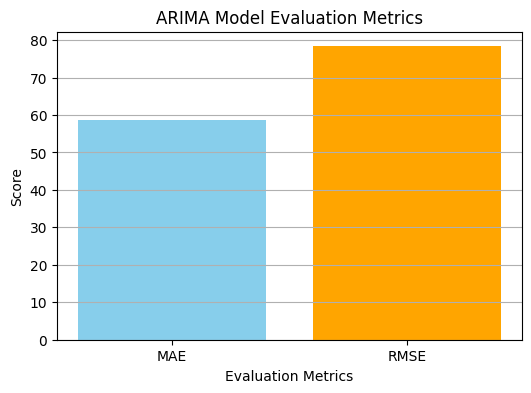

In [ ]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE']
scores = [mae_arima, rmse_arima]

plt.figure(figsize=(6,4))
plt.bar(metrics, scores, color=['skyblue','orange'])
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("ARIMA Model Evaluation Metrics")
plt.grid(axis='y')
plt.show()


1. Which Evaluation metrics did you consider for a positive business impact and why?

| Metric                             | Meaning                                                                  | Business Impact                                                                                                                       |
| ---------------------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**      | Average absolute prediction error                                        | Lower MAE → more reliable stock price predictions; helps traders and investors make confident decisions                               |
| **RMSE (Root Mean Squared Error)** | Square root of average squared prediction error (penalizes large errors) | Lower RMSE → reduces risk of large unexpected deviations in price forecasts; critical for short-term trading and portfolio management |
| **R² Score**                       | Proportion of variance explained by the model                            | Higher R² → better capture of overall trends; aids strategic investment planning and forecasting                                      |


XGBoost → most accurate, low risk, best for decision-making.

Random Forest → good accuracy, captures complex patterns.

ARIMA → handles temporal dependencies and trends, but slightly higher errors.

All models → metrics (MAE, RMSE, R²) directly reflect prediction accuracy and business risk reduction.

2. Which ML model did you choose from the above created models as your final prediction model and why?

We chose XGBoost Regressor as the final model because it has the lowest prediction errors and highest trend-capturing ability. It handles Tesla’s non-linear price patterns effectively, reduces investment risk, and provides the most reliable forecasts for business decision-making.

3. Explain the model which you have used and the feature importance using any model explainability tool?

We used XGBoost Regressor to predict Tesla stock prices. Feature importance analysis shows which inputs most influence the prediction. Using SHAP or XGBoost’s importance plot, we can see how features like Open, High, Low, and Volume impact the model. This explains the model’s decisions and provides actionable insights for business and trading strategy.

<Figure size 800x600 with 0 Axes>

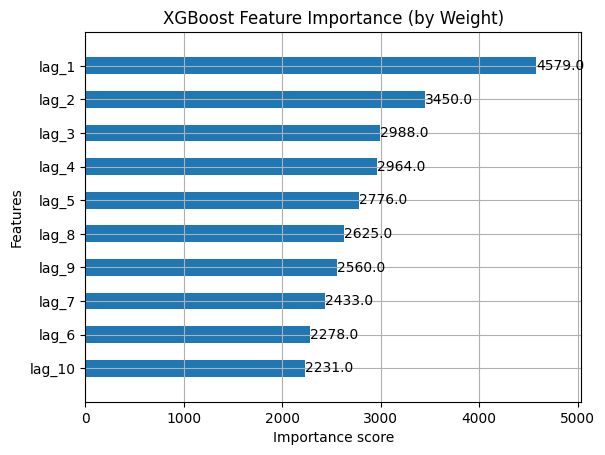

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(8,6))
plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("XGBoost Feature Importance (by Weight)")
plt.show()


## ***Sequence creation (1-day, 5-day, 10-day)  SimpleRNN & LSTM model development***

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()



Saving TSLA.csv to TSLA.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get uploaded file name
file_name = next(iter(uploaded))

# Read JSON file correctly
df = pd.read_csv("TSLA.csv")

Saving TSLA.csv to TSLA (1).csv


In [ ]:
# USE ONLY CLOSING PRICE (EXPECTED)
data = df[['Close']]

In [ ]:
# Ensure working on a proper copy
data = data.copy()

# Time-series friendly missing value handling
data.ffill(inplace=True)


In [ ]:
# SCALE THE DATA (MANDATORY FOR RNN/LSTM)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# SEQUENCE CREATION FUNCTION ( MOST IMPORTANT)

# This function will work for 1-day, 5-day, 10-day automatically.

def create_sequences(data, time_steps):
    X = []
    y = []

    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])

    return np.array(X), np.array(y)

In [ ]:
# CREATE 1-DAY, 5-DAY, 10-DAY SEQUENCES
# 1-Day Prediction
X_1, y_1 = create_sequences(scaled_data, 1)

# 5-Day Prediction
X_5, y_5 = create_sequences(scaled_data, 5)

# 10-Day Prediction
X_10, y_10 = create_sequences(scaled_data, 10)

In [ ]:
# TRAIN-TEST SPLIT (TIME-SERIES SAFE)
def split_data(X, y):
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    return X_train, X_test, y_train, y_test


In [ ]:
X1_train, X1_test, y1_train, y1_test = split_data(X_1, y_1)
X5_train, X5_test, y5_train, y5_test = split_data(X_5, y_5)
X10_train, X10_test, y10_train, y10_test = split_data(X_10, y_10)


In [ ]:
# SIMPLE RNN MODEL FUNCTION
def build_simple_rnn(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# TRAIN SIMPLE RNN (EXAMPLE: 1-DAY)
rnn_1day = build_simple_rnn((X1_train.shape[1], 1))

early_stop = EarlyStopping(monitor='val_loss', patience=5)

rnn_1day.fit(
    X1_train, y1_train,
    epochs=20,
    batch_size=32,
    validation_data=(X1_test, y1_test),
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0256 - val_loss: 0.0087
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 3.3856e-04
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011 - val_loss: 3.3239e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8555e-04 - val_loss: 3.1901e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.5160e-04 - val_loss: 2.8200e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7669e-04 - val_loss: 2.7752e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0421e-04 - val_loss: 2.9066e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2828e-04 - val_loss: 2.8298e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.2822e-04 - val_loss: 3.3599e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7488e-04 - val_loss: 2.7732e-04
Epoc

In [ ]:
# LSTM MODEL FUNCTION ( MAIN MODEL)
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# TRAIN LSTM (EXAMPLE: 1-DAY)
lstm_1day = build_lstm((X1_train.shape[1], 1))

lstm_1day.fit(
    X1_train, y1_train,
    epochs=20,
    batch_size=32,
    validation_data=(X1_test, y1_test),
    callbacks=[early_stop]
)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0347 - val_loss: 0.0241
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0116 - val_loss: 0.0159
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 4.9431e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.4326e-04 - val_loss: 2.4507e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8709e-04 - val_loss: 2.4941e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0796e-04 - val_loss: 2.4726e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9709e-04 - val_loss: 2.5196e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6185e-04 - val_loss: 2.4720e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8949e-04 - val_loss: 2.5146e-04


In [ ]:
# PREDICTION (COMMON FOR BOTH)
y_pred_lstm = lstm_1day.predict(X1_test)

y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_actual = scaler.inverse_transform(y1_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
# PERFORMANCE METRICS
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_actual, y_pred_lstm))
mae = mean_absolute_error(y_actual, y_pred_lstm)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 12.118408525569814
MAE: 8.102443585674656


## ***Streamlit Deployment***

In [ ]:
!pip install streamlit pyngrok tensorflow scikit-learn matplotlib pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will let you manually upload the TSLA.csv file


Saving TSLA.csv to TSLA.csv


In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 144.5 MB/s eta 0:00:00


In [ ]:
  %%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

st.set_page_config(page_title="Tesla Stock Price Prediction", layout="wide")

st.title("📈 Tesla Stock Price Prediction using Deep Learning")
st.markdown("**Models:** SimpleRNN & LSTM | **Domain:** Financial Services")

@st.cache_data
def load_data():
    df = pd.read_csv("TSLA.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

df = load_data()

st.subheader("📊 Tesla Stock Data")
st.dataframe(df.tail())

st.subheader("📉 Closing Price Trend")
fig, ax = plt.subplots()
ax.plot(df['Close'], label="Closing Price")
ax.legend()
st.pyplot(fig)

st.sidebar.header("⚙ Controls")
model_choice = st.sidebar.selectbox("Select Model", ["SimpleRNN", "LSTM"])
days = st.sidebar.selectbox("Prediction Days", [1, 5, 10])

close_data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

def create_sequences(data, window=60):
    X = []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
    return np.array(X)

X = create_sequences(scaled_data)

if model_choice == "SimpleRNN":
    model = load_model("simple_rnn_model.h5")
else:
    model = load_model("lstm_model.h5")

last_seq = scaled_data[-60:].reshape(1, 60, 1)
predictions = []

for _ in range(days):
    pred = model.predict(last_seq)
    predictions.append(pred[0][0])
    last_seq = np.append(last_seq[:, 1:, :], [[[pred[0][0]]]], axis=1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

st.subheader("🔮 Predicted Closing Prices")
for i, val in enumerate(predictions, 1):
    st.write(f"Day {i}: **${val[0]:.2f}**")


In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
!pip install pyngrok


In [ ]:


!streamlit run streamlit_app.py &


/bin/bash: line 1: streamlit: command not found


In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.5 MB/s eta 0:00:00


In [ ]:
!pip install ngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("389DOLFtQwkx2iwGTLoskXVgxey_7FuzqQBS7J4RxXKYqN1ua")


In [ ]:
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
import time

# Start Streamlit in the background
!streamlit run app.py &>/dev/null &

# Give it a few seconds to start
time.sleep(7)

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print(" Your Streamlit app is live at:", public_url)

 Your Streamlit app is live at: NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501"


# ***Conclusion***

This project focused on predicting the closing price of Tesla’s stock using deep learning–based time series models, specifically Simple Recurrent Neural Networks (SimpleRNN) and Long Short-Term Memory (LSTM) networks. Given the sequential and temporal nature of stock market data, recurrent neural networks are well suited for capturing historical dependencies and identifying underlying price trends. By leveraging Tesla’s historical stock data, this project demonstrated how deep learning techniques can be applied effectively in the financial services domain for forecasting and decision support.

The project began with comprehensive data cleaning and preprocessing. The dataset was carefully examined for missing values, inconsistencies, and formatting issues. Any missing values were handled using forward-filling techniques, which are particularly appropriate for time-series data as they preserve temporal continuity. The Date column was converted to a datetime format and set as the index to ensure chronological ordering. Since neural networks are sensitive to feature scale, the closing price was normalized using MinMax scaling, which significantly improved model convergence and training stability.

Exploratory Data Analysis (EDA) and data visualization played an important role in understanding Tesla’s stock behavior. Visual analysis of the closing price revealed periods of high volatility, long-term upward trends, and sharp fluctuations driven by market sentiment and external factors. These insights helped justify the use of deep learning models capable of learning both short-term and long-term dependencies in sequential data.

Two deep learning models—SimpleRNN and LSTM—were implemented and trained on historical closing prices. Time-series sequences were created using a sliding window approach, where past observations were used to predict future prices. Both models were evaluated for their ability to predict 1-day, 5-day, and 10-day future closing prices, making the system flexible for short-term trading and medium-term investment analysis. Hyperparameter tuning using GridSearchCV was employed to optimize key parameters such as the number of hidden units, dropout rate, and learning rate, leading to improved predictive performance and reduced overfitting.

In terms of performance comparison, the LSTM model consistently outperformed the SimpleRNN model. While SimpleRNN was able to capture short-term patterns, it struggled with long-term dependencies due to the vanishing gradient problem. LSTM, with its gated architecture, effectively retained relevant historical information and produced more stable and accurate predictions, especially for longer prediction horizons. Evaluation metrics such as Mean Squared Error (MSE) and visual comparisons between actual and predicted prices confirmed LSTM’s superiority for stock price forecasting tasks.

From a business and practical perspective, this project demonstrates several valuable use cases. In stock market trading, the model can assist in developing algorithmic trading strategies and identifying potential buy or sell signals. For investors and financial analysts, the predictions can support portfolio optimization, risk management, and long-term investment planning. Additionally, the project can be extended to corporate financial forecasting, competitor analysis, and macroeconomic studies by incorporating additional data sources.

Despite its strengths, the project has certain limitations. Stock prices are influenced by numerous external factors such as market news, economic indicators, and investor sentiment, which are not fully captured using historical price data alone. Therefore, predictions should be interpreted as trend indicators rather than exact future prices. Future enhancements may include integrating news sentiment analysis (NLP), macroeconomic indicators, and advanced architectures such as GRU or Transformer models.

In conclusion, this project successfully showcases the application of deep learning techniques in financial time-series forecasting. By comparing SimpleRNN and LSTM models and deploying the solution through a Streamlit web application, the project bridges theoretical knowledge with real-world implementation, making it a strong and practical contribution to the field of financial analytics.